# Proyecto de Aprendizaje Supervisado
Se adelanta un proyecto de aprendizaje supervisado de regresión con el dataset de Admisiones universitarias.

**Integrantes**
- Luisa Fernanda Giraldo
- Juan Sebastián Guzmán

## 1. Librerías básicas a utilizar

- Pandas: para el análisis de datos a través de dataframes (data tabular)
- Numpy: para todo lo relacionado con manipulación de arreglos y análisis numérico
- Seaborn y matplotlib.pyplot: para visualización de datos

In [1]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

# Librería para el manejo de expresiones regulares
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('university_admission.csv')
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 3.1. Limpieza de datos

Para realizar una apropiada limpieza de datos se deben entender cada una de las variables presentes dentro del conjunto de datos.

Elementos a tener en cuenta:
- El significado y tipo (e.g. nominal/ordinal/intervalo/ratio) de cada una de las variables
- Identificación de valores faltantes y en caso de haberlos plantear las opciones para tratarlos
- Presencia de datos atípicos y en caso de haberlos identificar la manera de tratarlos


In [4]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

Formateamos los nombres de las variables

In [5]:
def format_columns(df):
    result = df.copy()
    new_cols = []
    for col in result.columns:
        new_cols.append(re.sub(r'\s+', ' ',col.strip()).replace(' ','_').lower())
    result.columns = new_cols
    return result

In [6]:
df = format_columns(df)
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admission'],
      dtype='object')

### Valores faltantes

- Detección de valores faltantes
- Manejo de valores faltantes

### ¿Qué podemos hacer con estos?

- Identificar valores faltantes (no necesariamente representados por null)
- Imputarlos
- Eliminarlos (registros o columnas)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gre_score            1000 non-null   int64  
 1   toefl_score          1000 non-null   int64  
 2   university_rating    1000 non-null   int64  
 3   sop                  1000 non-null   float64
 4   lor                  1000 non-null   float64
 5   cgpa                 1000 non-null   float64
 6   research             1000 non-null   int64  
 7   chance_of_admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [8]:
df.isnull().sum()

gre_score              0
toefl_score            0
university_rating      0
sop                    0
lor                    0
cgpa                   0
research               0
chance_of_admission    0
dtype: int64

Podemos evidenciar que no existen variables con datos nulos,

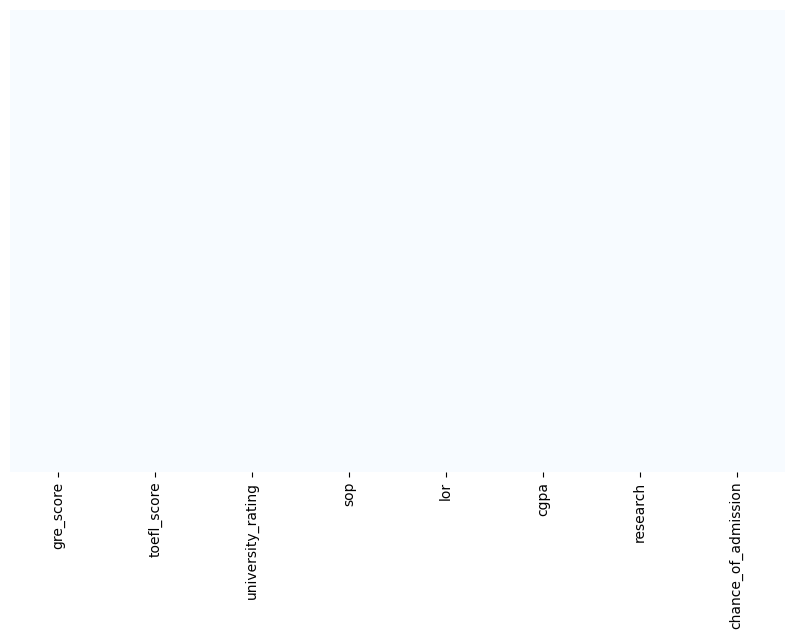

In [9]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [10]:
df.describe()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


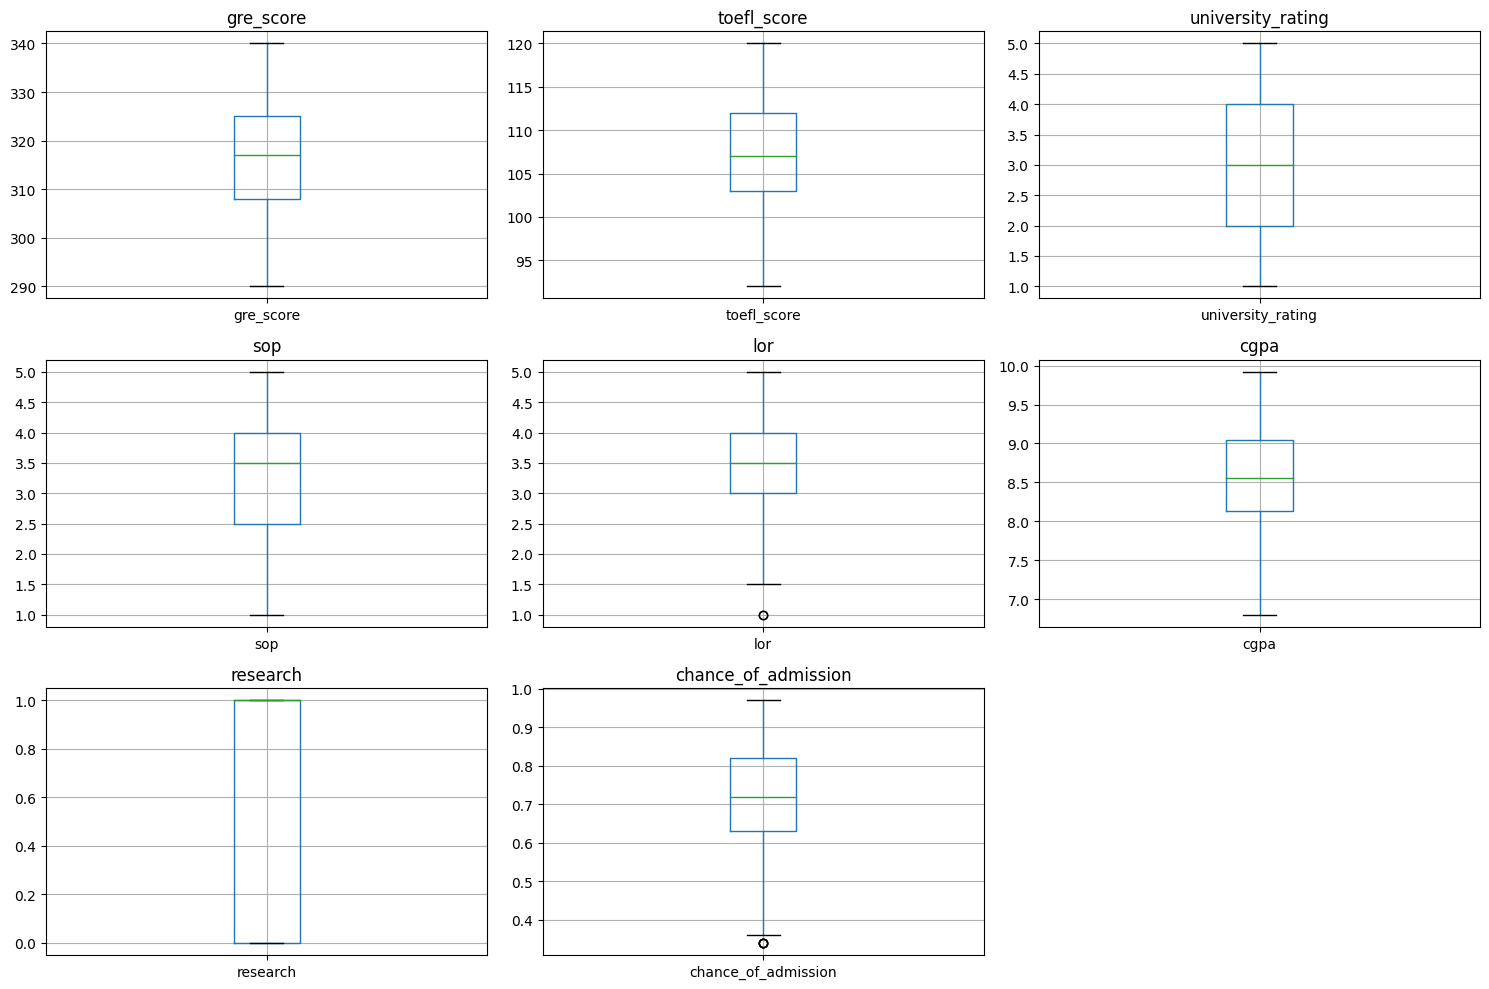

In [11]:
# Utilizamos diagramas de cajas y bigotes

plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, start=1):
    plt.subplot(3, 3, i)  # Cambiado a una cuadrícula de 3x3
    df.boxplot(col)
    plt.title(col)  # Agregar título para cada subplot

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Definir la función para obtener X e y
def obtain_X_y(df):
    return df.drop(columns=['chance_of_admission']), df[['chance_of_admission']]


X, y = obtain_X_y(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)



### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [13]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

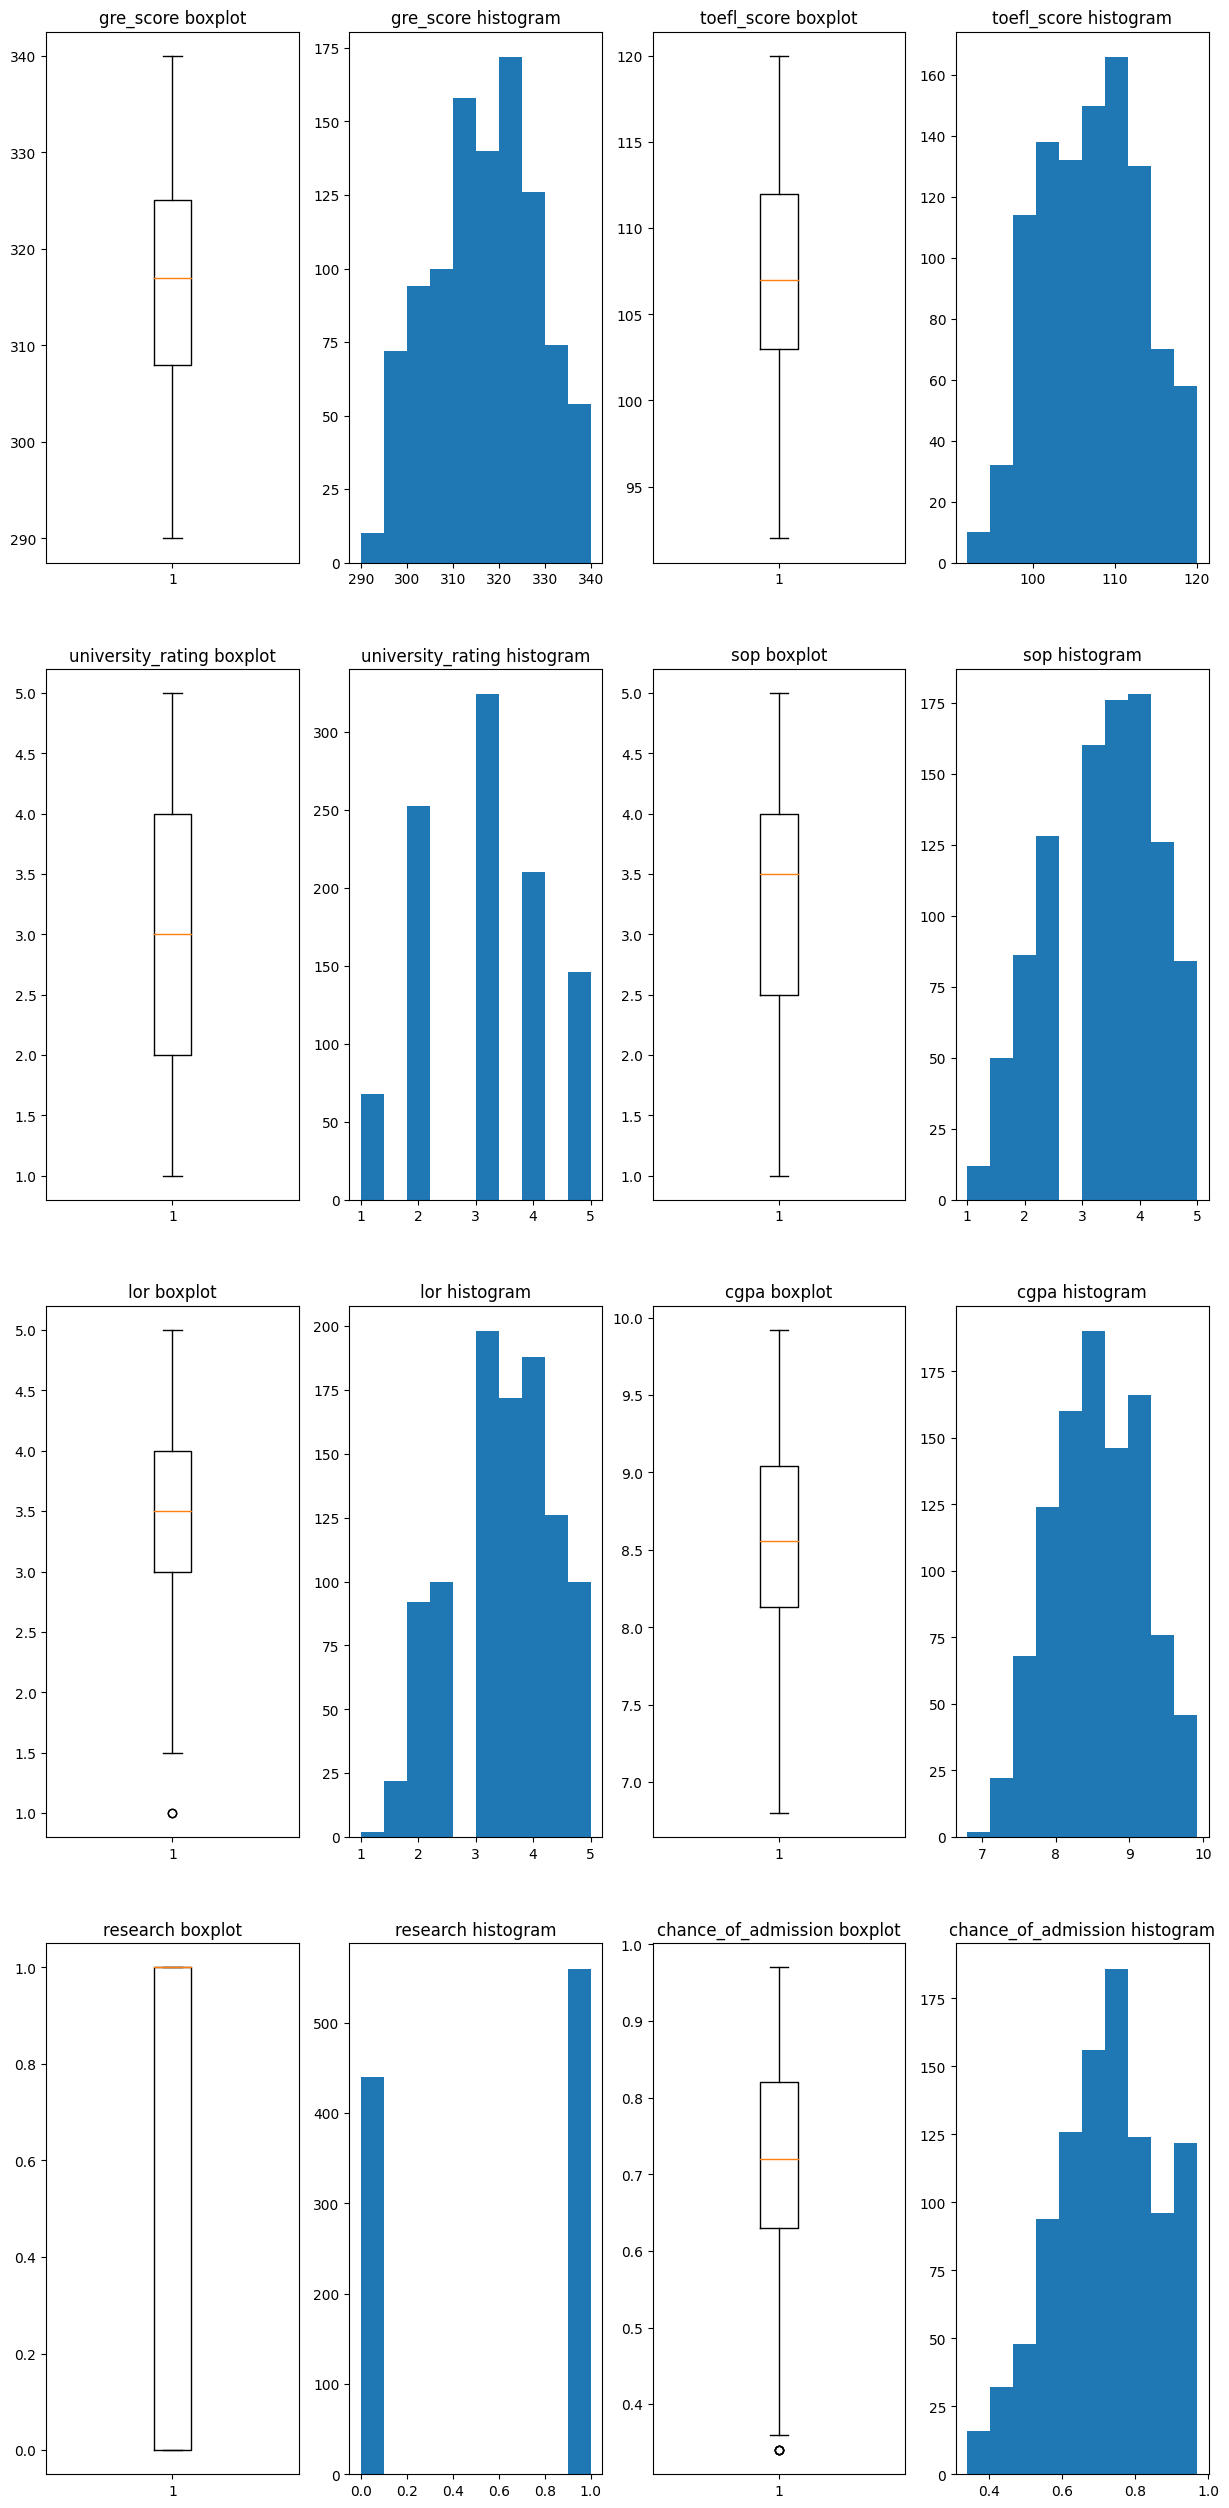

In [14]:
outliers_visual(df)

In [15]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [16]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df.select_dtypes('number').columns):
    if outlier_count(col, df) > 0:
        cont_vars.append(col)

---------------gre_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------toefl_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------university_rating---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sop---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------lor---------------
Number of outliers: 2
Percent of data that is outlier: 0.2%
---------------cgpa---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------research---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chance_of_admission---------------
Number of outliers: 4
Percent of data that is outlier: 0.4%


Se evidencia que no existen un número significativo de registros con datos atípicos, lo que nos lleva a intuir que el conjunto de datos ha sido preprocesado antes de este análisis. Sin embargo, como ejercicio adicional se adelanta un 'winsorize' a las dos variables que presentan datos atípicos.

In [17]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

In [18]:
cont_vars

['lor', 'chance_of_admission']

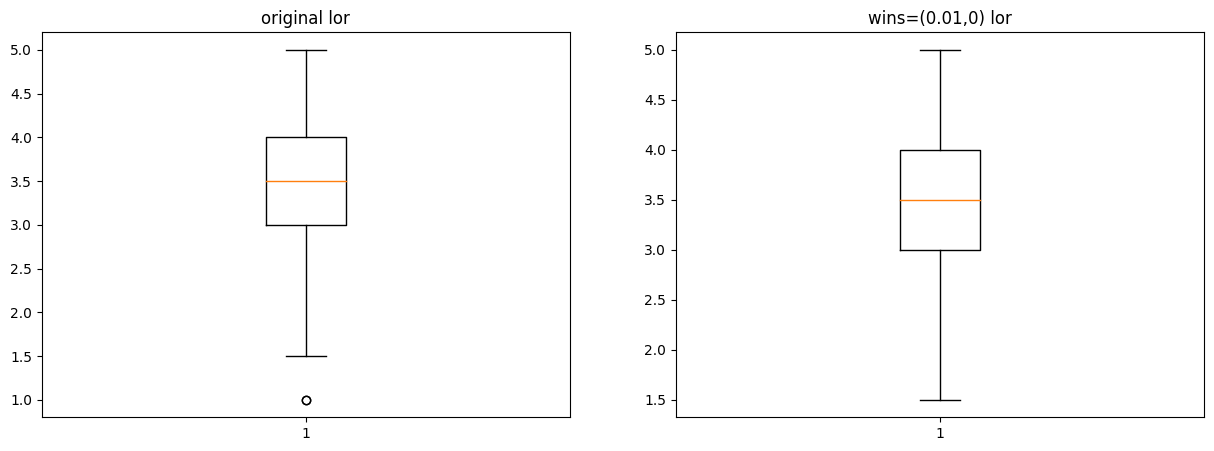

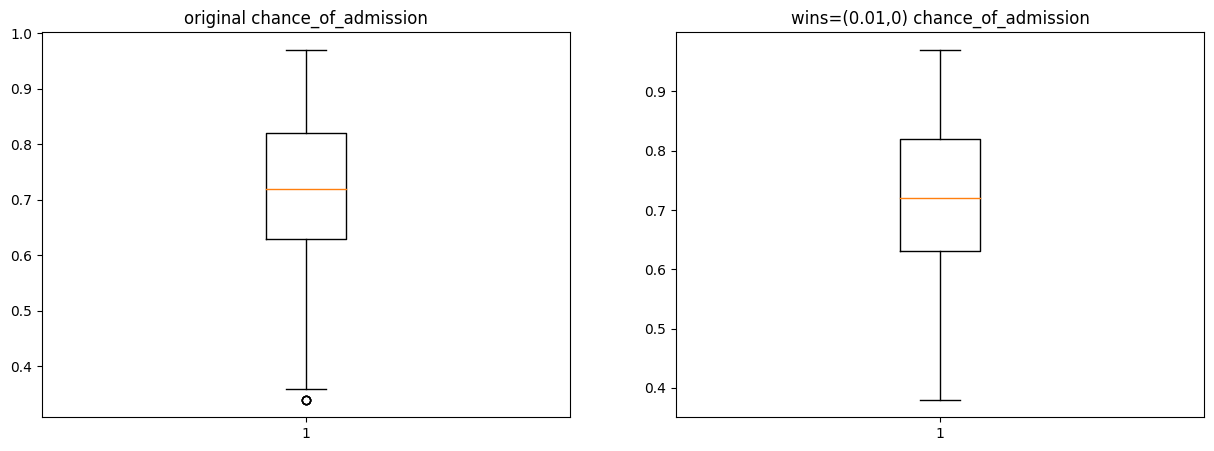

In [19]:
wins_dict = {}
wins_dict = test_wins(cont_vars[0], df, wins_dict, lower_limit=.01, show_plot=True)
wins_dict = test_wins(cont_vars[1], df, wins_dict, lower_limit=.01, show_plot=True)

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        wins_df =pd.DataFrame(index = X.index)
        for col in ['gre_score', 'toefl_score', 'university_rating', 'sop', 'cgpa',
       'research']:
            wins_df[col] = X[col]
        for col in self.cont_vars:
                wins_df[col] = self.wins[col]
        return wins_df

In [21]:
df_wins = Winsorizer(wins_dict,cont_vars).fit_transform(df)
df_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gre_score            1000 non-null   int64  
 1   toefl_score          1000 non-null   int64  
 2   university_rating    1000 non-null   int64  
 3   sop                  1000 non-null   float64
 4   cgpa                 1000 non-null   float64
 5   research             1000 non-null   int64  
 6   lor                  1000 non-null   float64
 7   chance_of_admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


Representamos visualmente la eliminación de los atípicos.

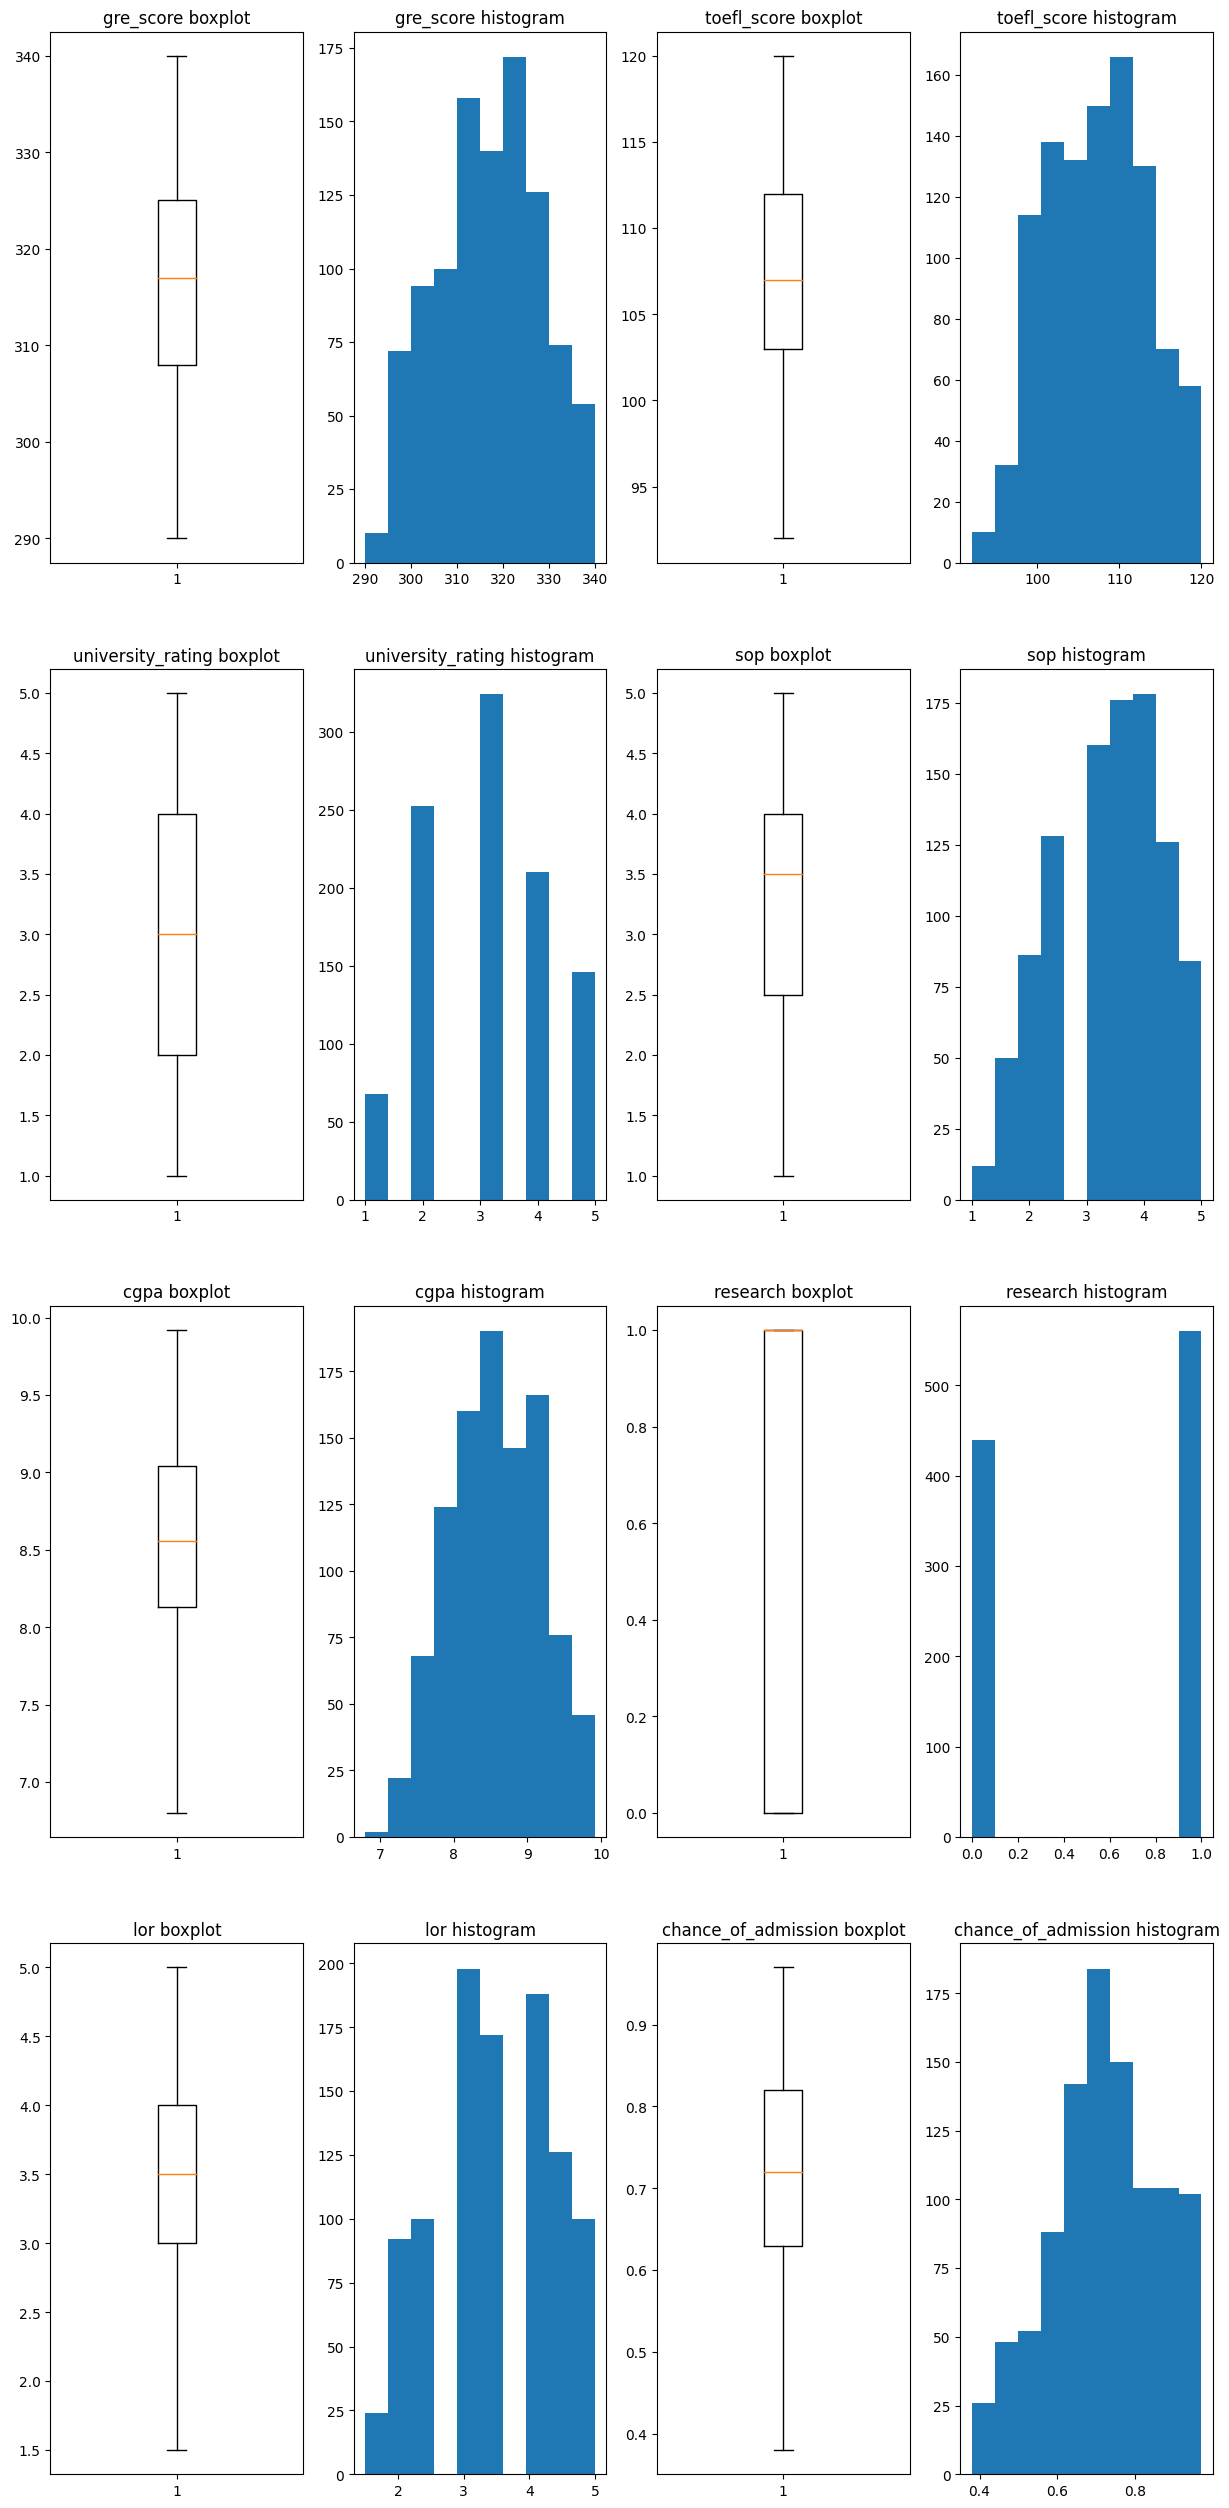

In [22]:
outliers_visual(df_wins)

In [23]:
cont_vars1 = []
for col in list(df_wins.select_dtypes('number').columns):
    if outlier_count(col, df_wins) > 0:
        cont_vars.append(col)

---------------gre_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------toefl_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------university_rating---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sop---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------cgpa---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------research---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------lor---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chance_of_admission---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%


## 3. Exploracion de datos
- Análisis univariado
    - Variables continuas
    - Variables categóricas
- Análisis Bivariado
    - Variables continuas comparadas con variable objetivo y entre sí
    - Variables categóricas con respecto a variable objetivo

### Análisis univariado

Procedemos a analizar variable por variable para conocer su naturaleza y comportamiento.

In [24]:
df_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gre_score            1000 non-null   int64  
 1   toefl_score          1000 non-null   int64  
 2   university_rating    1000 non-null   int64  
 3   sop                  1000 non-null   float64
 4   cgpa                 1000 non-null   float64
 5   research             1000 non-null   int64  
 6   lor                  1000 non-null   float64
 7   chance_of_admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [25]:
df_wins.describe()

,gre_score,toefl_score,university_rating,sop,cgpa,research,lor,chance_of_admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,316.472000,107.193000,3.114000,3.374000,8.57644,0.560000,3.485000,0.722000
std,11.289494,6.079368,1.142939,0.990507,0.60451,0.496635,0.922565,0.140408
min,290.000000,92.000000,1.000000,1.000000,6.80000,0.000000,1.500000,0.380000
25%,308.000000,103.000000,2.000000,2.500000,8.12750,0.000000,3.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,8.56000,1.000000,3.500000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,9.04000,1.000000,4.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,9.92000,1.000000,5.000000,0.970000


Continuamos con un análisis gráfico de la distribución de las variables

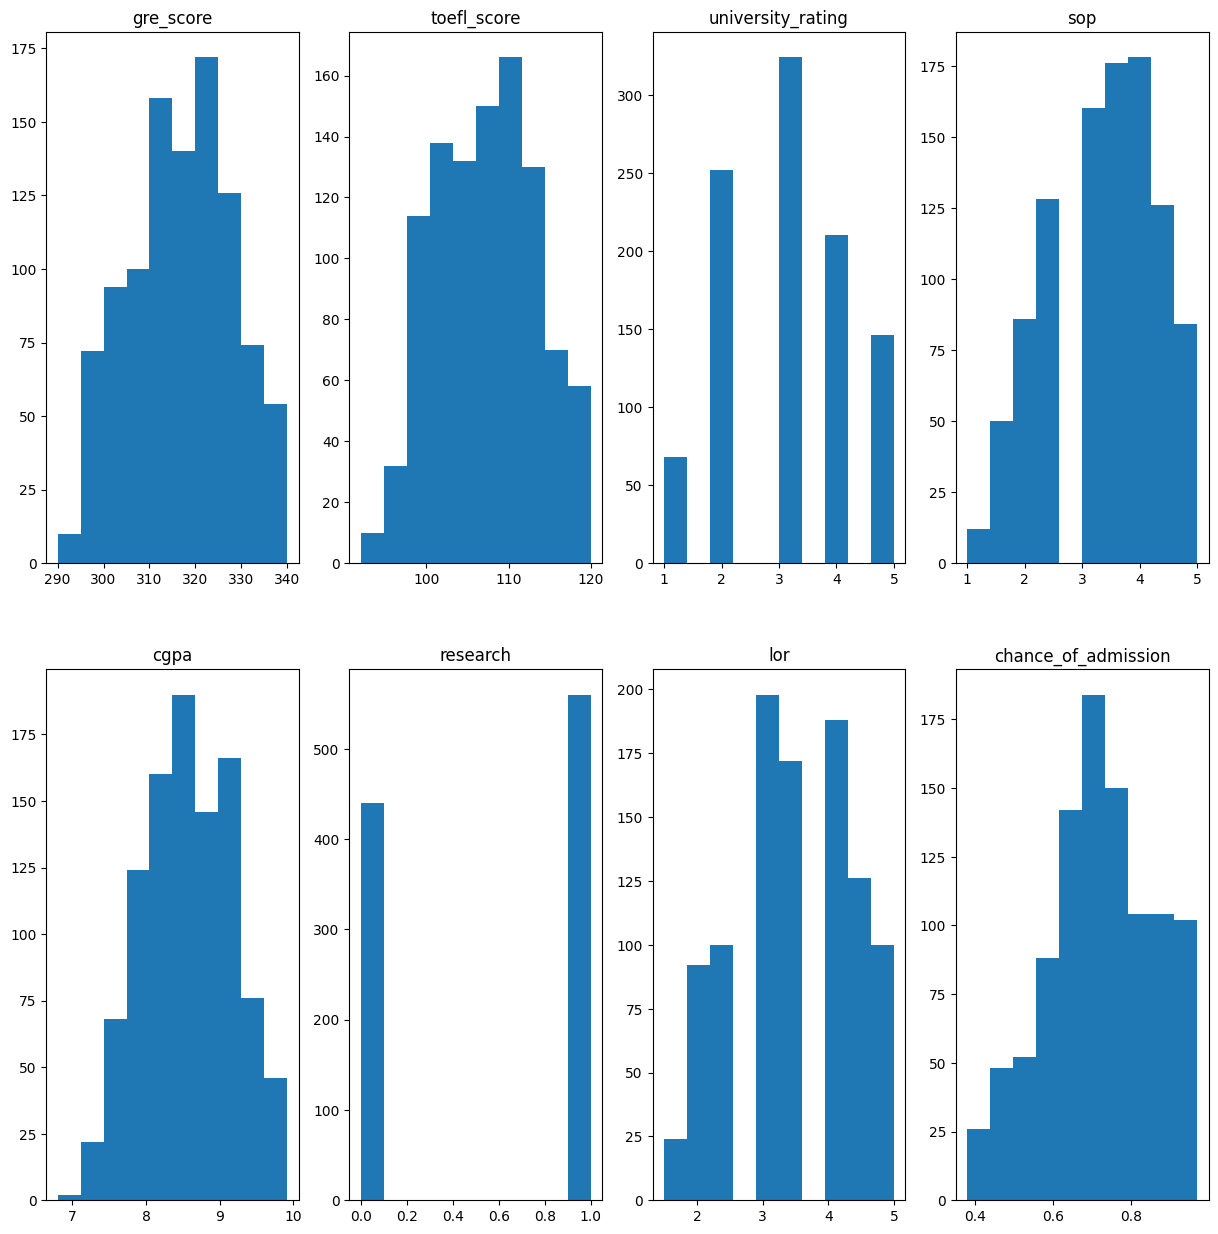

In [26]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 40))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

visualize_distributions(df_wins)

Al generar los histrogramas, vemos que las variables 'gre_score', 'toefl_score' y 'cgpa' siguen una distribución más o menos normal. Las variables 'lor' y 'chance_of_admision' que se sometieron a un winsorize presentan una distribución más o menos normal.  

### Análisis Bivariado
Aspectos de relevancia a tener en cuenta:
- Variables continuas con respecto a la probabilidad de aceptación (independientes vs dependiente) y entre ellas
- Variables categóricas con respecto a la probabilidad de acepación (independientes vs dependiente)

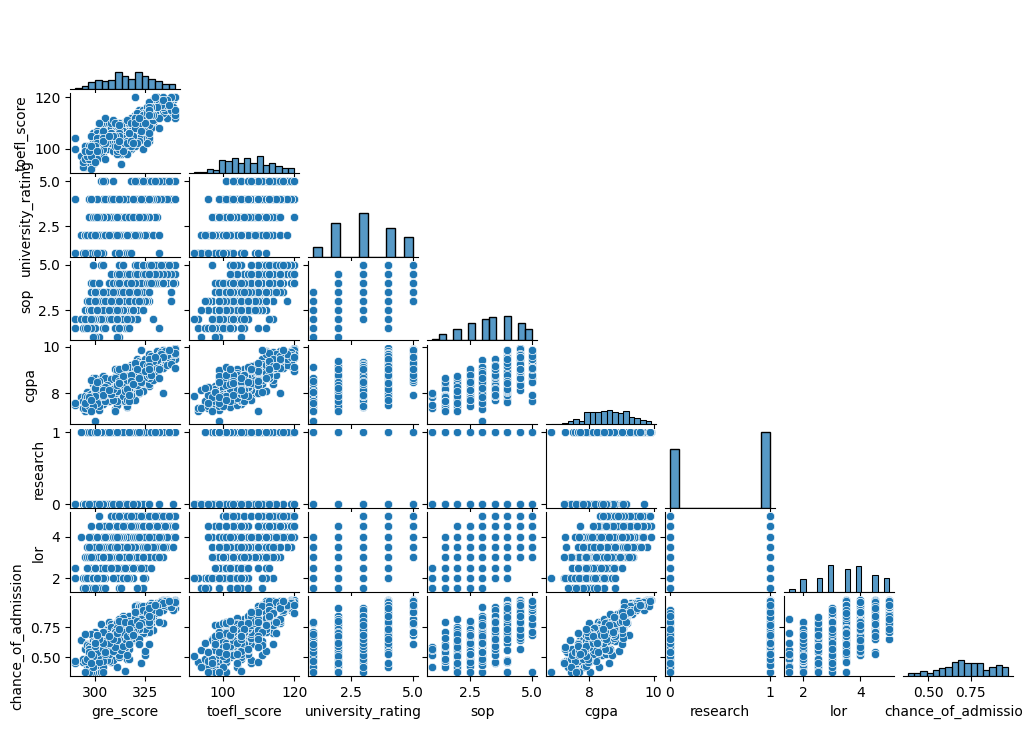

In [27]:
sns.pairplot(df_wins, corner=True)
plt.gcf().set_size_inches(10,7)

In [28]:
# Matriz de correlación entre variables continuas
df_wins[df_wins.select_dtypes('number').columns].corr()

,gre_score,toefl_score,university_rating,sop,cgpa,research,lor,chance_of_admission
gre_score,1.000000,0.827076,0.635376,0.613498,0.825878,0.563398,0.524377,0.811223
toefl_score,0.827076,1.000000,0.649725,0.644374,0.810644,0.466453,0.540406,0.792778
university_rating,0.635376,0.649725,1.000000,0.728024,0.705254,0.427047,0.608241,0.691452
sop,0.613498,0.644374,0.728024,1.000000,0.712154,0.408116,0.662848,0.686515
cgpa,0.825878,0.810644,0.705254,0.712154,1.000000,0.501311,0.636923,0.883464
research,0.563398,0.466453,0.427047,0.408116,0.501311,1.000000,0.372280,0.546926
lor,0.524377,0.540406,0.608241,0.662848,0.636923,0.372280,1.000000,0.645486
chance_of_admission,0.811223,0.792778,0.691452,0.686515,0.883464,0.546926,0.645486,1.000000


In [29]:
def correlation_matrix(df,y=True):
    if y:
        cont_vars = list(df.select_dtypes('number').columns)
    else:
        cont_vars = list(df.select_dtypes('number').columns)
    mask = np.triu(df[cont_vars].corr())
    plt.figure(figsize=(10,7))
    sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='mako', mask=mask)
    plt.ylim(9, 0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

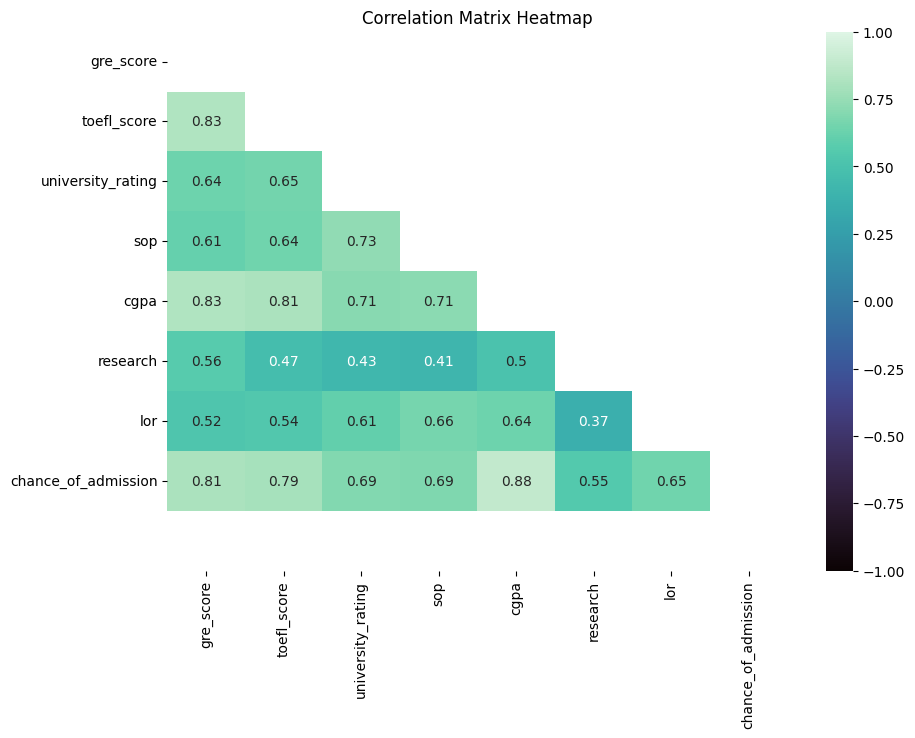

In [30]:
correlation_matrix(df_wins)

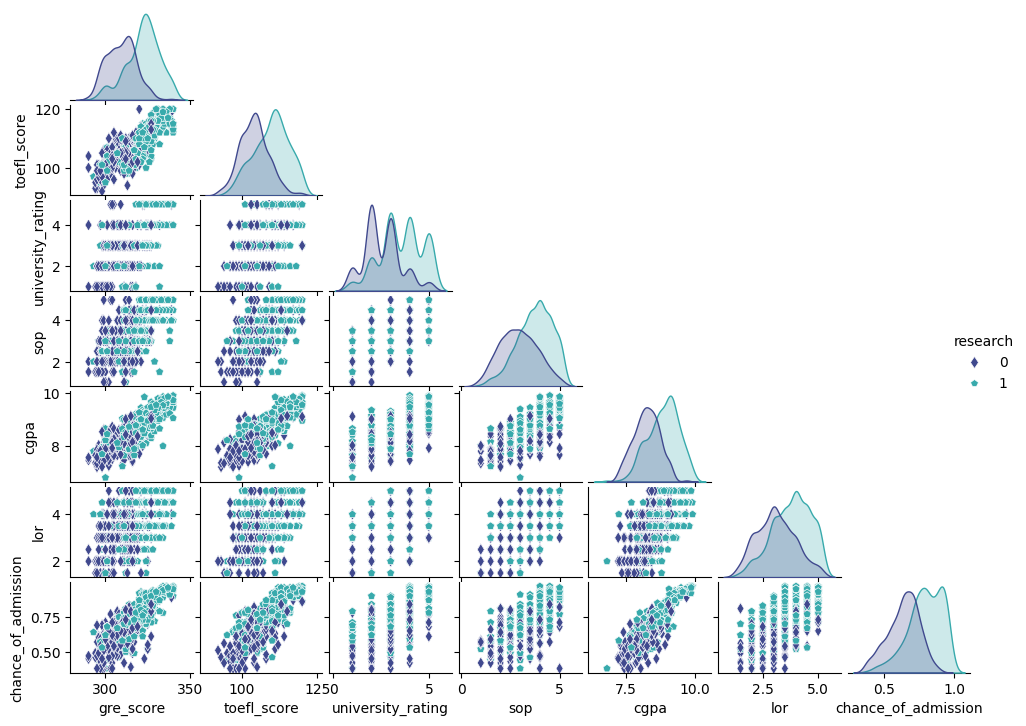

In [31]:
sns.pairplot(df_wins, hue='research', palette='mako', markers = ['d', 'p'], corner=True)
plt.gcf().set_size_inches(10,7)

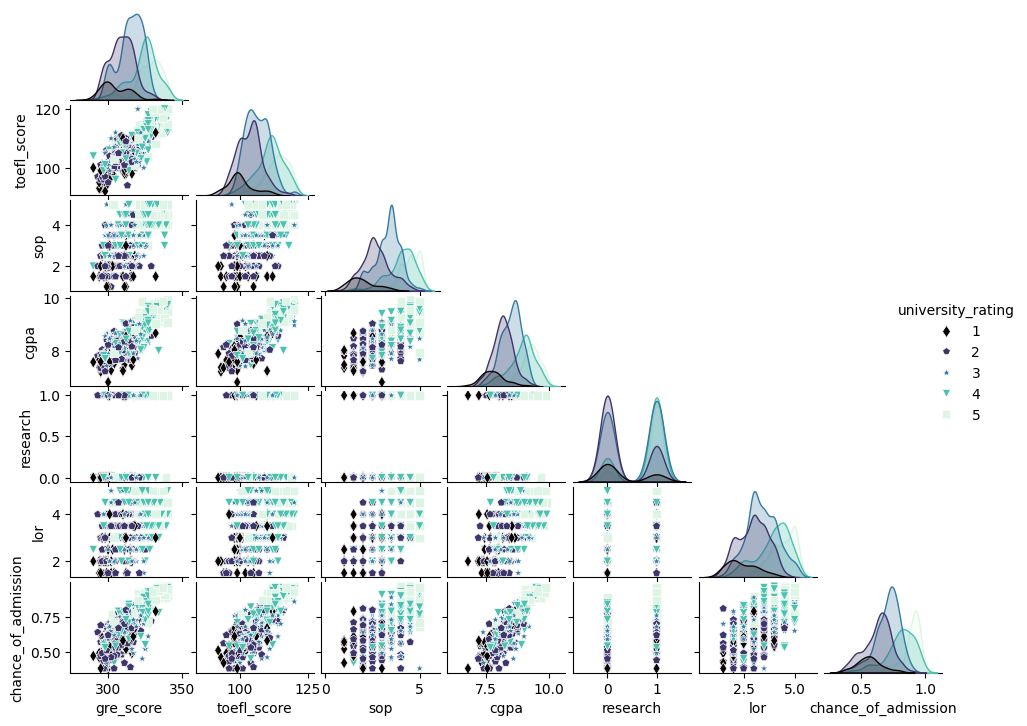

In [32]:
sns.pairplot(df_wins, hue='university_rating', palette='mako', markers = ['d', 'p', '*', 'v','s'], corner=True)
plt.gcf().set_size_inches(10,7)

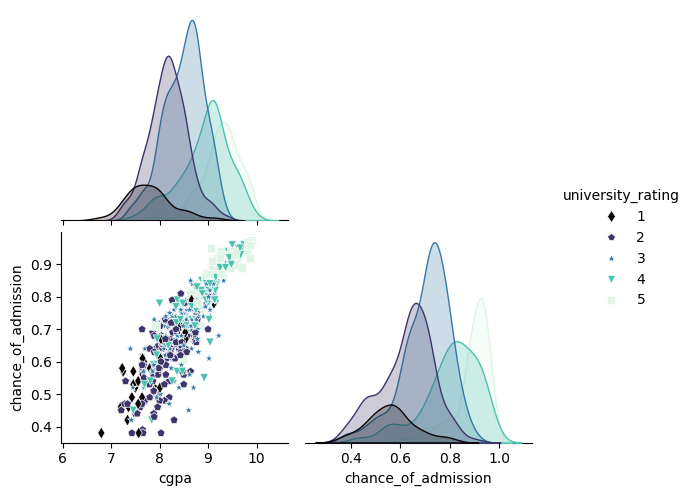

In [33]:
sns.pairplot(df_wins,vars=['cgpa','chance_of_admission'], hue='university_rating', palette='mako', markers = ['d', 'p', '*', 'v','s'], corner=True)
plt.gcf().set_size_inches(7,5)

In [34]:
df_wins.groupby('university_rating').cgpa.agg(['mean'])

,mean
university_rating,
1,7.798529
2,8.177778
3,8.500123
4,8.936667
5,9.278082


Al realizar el análisis bivariado podemos evidenciar:
 - Todos los atributos están positivamente correlacionados con la variable objetivo _'chance_of_admision'_;
 - Vemos que entre mayor es el promedio académico acumulado y mejor le fue a un estudiante en la prueba estandarizada _'gre'_, más probabilidades de admisión tiene.
 - Los estudiantes que están o han estado involucrados en proyectos de investigación presentan en promedio mayor probabilidad de admisión que los que no.
 - El promedio de un estudiante tiene una correlación positiva con el rating de la universidad a la que pertence; lo que es lo mismo, los mejores estudiantes están en las mejores escuelas.

## 4. Protocolos de evaluación

In [35]:
# Con nuestra primera aproximación (imputación con la media)
# Eliminación de variables altamente correlacionadas
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento

from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()


X['mean_rem'], y['mean_rem'] = obtain_X_y(df_wins)

X_train['mean_rem'], X_test['mean_rem'], y_train['mean_rem'], y_test['mean_rem'] = train_test_split(X['mean_rem'],y['mean_rem'],random_state=1234,test_size=0.3)
print(X_train['mean_rem'].shape)
print(X_test['mean_rem'].shape)
print(y_train['mean_rem'].shape)
print(y_test['mean_rem'].shape)

(700, 7)
(300, 7)
(700, 1)
(300, 1)


## 5. Métricas de evaluación

In [36]:
# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto
# de entrenamiento y de prueba
# R2, R2 Ajustado MAE, MAPE, MSE, RMSE
# El coeficiente de determinación se puede ver como la varianza total explicada por el modelo,
# es decir la proporción de la varianza en la variable dependiente que se puede predecir a partir de
# las variables independientes
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics

def r2_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test

## 6. Implementación de los modelos

### 6.1. Baseline
Como punto de partida para poder comparar cualquier modelo de regresión que pensemos implementar, debemos establecer un baseline. Al estar tratando con una tarea de regresión, hacemos uso de un Dummy regressor con estrategía de la media.

In [37]:
# Establecemos el baseline a partir de un dummy regressor

from sklearn.dummy import DummyRegressor

print('Using a dataframe with winsorize outliers')
regression_metrics(DummyRegressor(strategy='mean'),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()

Using a dataframe with winsorize outliers
Training R^2 = 0.0
Test R^2 = -0.0021425531757193195
Training Adj R^2 = -0.01011560693641611
Test Adj R^2 = -0.026166518491575586
Training MAE = 0.11328024489795918
Test MAE = 0.11458533333333333
Training MAPE = 0.17278393514215046
Test MAPE = 0.17788891780282468
Training RMSE = 0.13958693874925318
Test RMSE = 0.14212115842994452



Al adelantar el análisis con el Dummy Regresor vemos un $R^2 = 0$, lo que implica que el modelo es muy malo prediciendo la probabilidad de ingresar a una universidad. Por lo mismo, procedemos a realizar el análisis con otros regresores.  

### 6.2. Modelo de K vecinos más cercanos

In [38]:
# Utilizamos knn
# Con el dataset imputado con la media y eliminando las variables
# altamente correlacionadas
# Utilizamos el Knn regressor con sus parámetros por defecto

from sklearn.neighbors import KNeighborsRegressor

knnReg = KNeighborsRegressor()
regression_metrics(knnReg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Training R^2 = 0.8451605459222058
Test R^2 = 0.7646514421725235
Training Adj R^2 = 0.8435942508665055
Test Adj R^2 = 0.7590095246903579
Training MAE = 0.03966857142857143
Test MAE = 0.05016666666666667
Training MAPE = 0.06234560937208893
Test MAPE = 0.08165035829083453
Training RMSE = 0.0549269644944214
Test RMSE = 0.06887312005903803


(KNeighborsRegressor(),
 {'Training R^2': 0.8451605459222058,
  'Test R^2': 0.7646514421725235,
  'Training Adj R^2': 0.8435942508665055,
  'Test Adj R^2': 0.7590095246903579,
  'Training MAE': 0.03966857142857143,
  'Test MAE': 0.05016666666666667,
  'Training MAPE': 0.06234560937208893,
  'Test MAPE': 0.08165035829083453,
  'Training RMSE': 0.0549269644944214,
  'Test RMSE': 0.06887312005903803})

Al correr el modelo de K vecinos vemos que las métricas mejoran mucho. Ahora contamos con un $Adj R^2$ del 76%. Si bien la métrica no es mala, al ser un modelo basado en distancias con unas variables que no fueron normalizadas es de esperar que el modelo no se ajuste con precisión a los datos.

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor())
regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsRegressor())
regression_metrics(knnReg_norm,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Stadardization
Training R^2 = 0.8772548991184166
Test R^2 = 0.8306948135240926
Training Adj R^2 = 0.8760132579245278
Test Adj R^2 = 0.8266361275469304
Training MAE = 0.03460285714285715
Test MAE = 0.04179333333333335
Training MAPE = 0.054957248496236705
Test MAPE = 0.06835054167089431
Training RMSE = 0.04890427968418073
Test RMSE = 0.058415637175902375

Normalization
Training R^2 = 0.8751283751084954
Test R^2 = 0.82741030785708
Training Adj R^2 = 0.8738652228335814
Test Adj R^2 = 0.8232728837303662
Training MAE = 0.03487428571428572
Test MAE = 0.042120000000000005
Training MAPE = 0.0551447476531531
Test MAPE = 0.0689389550198846
Training RMSE = 0.049326086983895824
Test RMSE = 0.05897954447659516


(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('kneighborsregressor', KNeighborsRegressor())]),
 {'Training R^2': 0.8751283751084954,
  'Test R^2': 0.82741030785708,
  'Training Adj R^2': 0.8738652228335814,
  'Test Adj R^2': 0.8232728837303662,
  'Training MAE': 0.03487428571428572,
  'Test MAE': 0.042120000000000005,
  'Training MAPE': 0.0551447476531531,
  'Test MAPE': 0.0689389550198846,
  'Training RMSE': 0.049326086983895824,
  'Test RMSE': 0.05897954447659516})

Al estandarizar/normalizar las variables vemos que el $Adj R^2$ mejora. Analizando los resultados podemos observar que en ambos casos, al utilizar procesos de escalamiento, se mejoran los resultados.

Ahora buscamos el mejor valor de k (único hiperparámetro de este modelo)

In [40]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
    print()


Results for k = 1
Training R^2 = 1.0
Test R^2 = 0.8630298291329368
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8597462976395482
Training MAE = 0.0
Test MAE = 0.020466666666666664
Training MAPE = 0.0
Test MAPE = 0.034573136121047864
Training RMSE = 0.0
Test RMSE = 0.05254204665471898

Results for k = 3
Training R^2 = 0.9363556412620894
Test R^2 = 0.8361459095243461
Training Adj R^2 = 0.9357118399453764
Test Adj R^2 = 0.8322179005060941
Training MAE = 0.024385714285714292
Test MAE = 0.04046666666666667
Training MAPE = 0.038094938588533286
Test MAPE = 0.06571737081832683
Training RMSE = 0.03521476061368819
Test RMSE = 0.057467543174547824

Results for k = 5
Training R^2 = 0.8772548991184166
Test R^2 = 0.8306948135240926
Training Adj R^2 = 0.8760132579245278
Test Adj R^2 = 0.8266361275469304
Training MAE = 0.03460285714285715
Test MAE = 0.04179333333333335
Training MAPE = 0.054957248496236705
Test MAPE = 0.06835054167089431
Training RMSE = 0.04890427968418073
Test RMSE = 0.058415637175902375



(0.8630298291329368, 1)


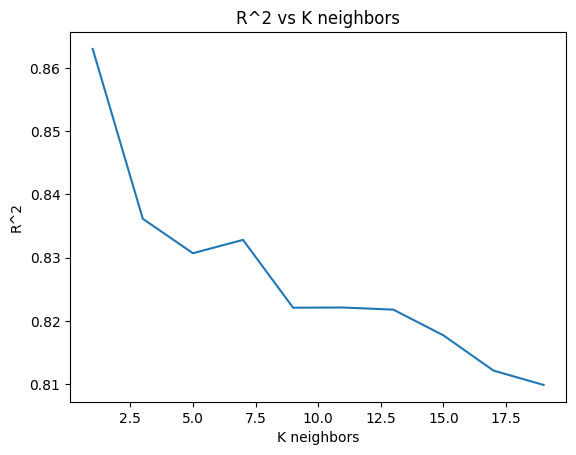

In [41]:
# Visualizamos el R^2

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Al revisar cómo se comporta el $R^2$ conforme cambiamos la cantidad de vecinos, vemos que los modelos más complejos son los que mejor predicen la variable dependiente.

In [42]:
!pip install pickle5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255318 sha256=17ebfe3b96d83e99400de092377c2030d6fc91d602d7d56e5995adf992865827
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [43]:
import pickle5 as pickle
# Guardamos el mejor modelo utilizando k=1 con todas las variables independientes e imputación con la media

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=1)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorWins.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorWinsMetrics.pkl','wb'))

Training R^2 = 1.0
Test R^2 = 0.8630298291329368
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8597462976395482
Training MAE = 0.0
Test MAE = 0.020466666666666664
Training MAPE = 0.0
Test MAPE = 0.034573136121047864
Training RMSE = 0.0
Test RMSE = 0.05254204665471898


### Selección de características

En esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos. Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

In [44]:
# Utilizamos un método para extracción recursiva de características utilizando validación cruzada
# Con este método obtenemos las variables independientes más importantes dentro del dataframe

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['mean_rem'], y_train['mean_rem'])

print("Ranking de características", selector.ranking_)

Ranking de características [1 1 1 1 1 1 1]


(0.9089401399669101, 5)


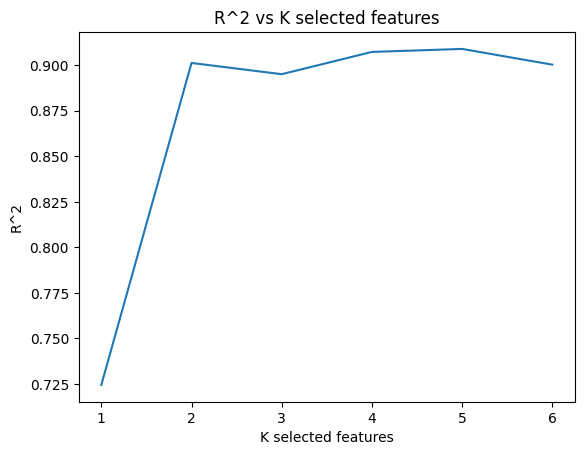

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=1)),
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,7)]
ax = sns.lineplot(x=range(1,7),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,7))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Guardamos el mejor modelo utilizando k=1 con feature selection (con 5 elegidas),
# imputación con la media y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=1)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorFSWins.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSWinsMetrics.pkl','wb'))

Training R^2 = 1.0
Test R^2 = 0.9089401399669101
Training Adj R^2 = 1.0
Test Adj R^2 = 0.9067571981168019
Training MAE = 0.0
Test MAE = 0.0166
Training MAPE = 0.0
Test MAPE = 0.028030630657323634
Training RMSE = 0.0
Test RMSE = 0.042840790531143716


### 6.3. Modelo de árbol de regresión

Training R^2 = 1.0
Test R^2 = 0.8752681684762871
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8722780218301707
Training MAE = 6.106226635438361e-18
Test MAE = 0.020066666666666667
Training MAPE = 6.91854307125566e-18
Test MAPE = 0.0330307771549405
Training RMSE = 3.554447978966673e-17
Test RMSE = 0.05013980454688669


[Text(0.5446428571428571, 0.9, 'x[4] <= 8.735\nsquared_error = 0.019\nsamples = 700\nvalue = 0.724'),
 Text(0.2857142857142857, 0.7, 'x[4] <= 8.035\nsquared_error = 0.011\nsamples = 410\nvalue = 0.637'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 100.5\nsquared_error = 0.009\nsamples = 147\nvalue = 0.554'),
 Text(0.07142857142857142, 0.3, 'x[4] <= 7.665\nsquared_error = 0.007\nsamples = 70\nvalue = 0.507'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 321.0\nsquared_error = 0.007\nsamples = 77\nvalue = 0.598'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'x[4] <= 8.325\nsquared_error = 0.006\nsamples = 263\nvalue = 0.683'),
 Text(0.35714285714285715, 0.3, 'x[0] <= 316.5\nsquared_error = 0.005\nsamples = 111\nvalue = 0.653'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n')

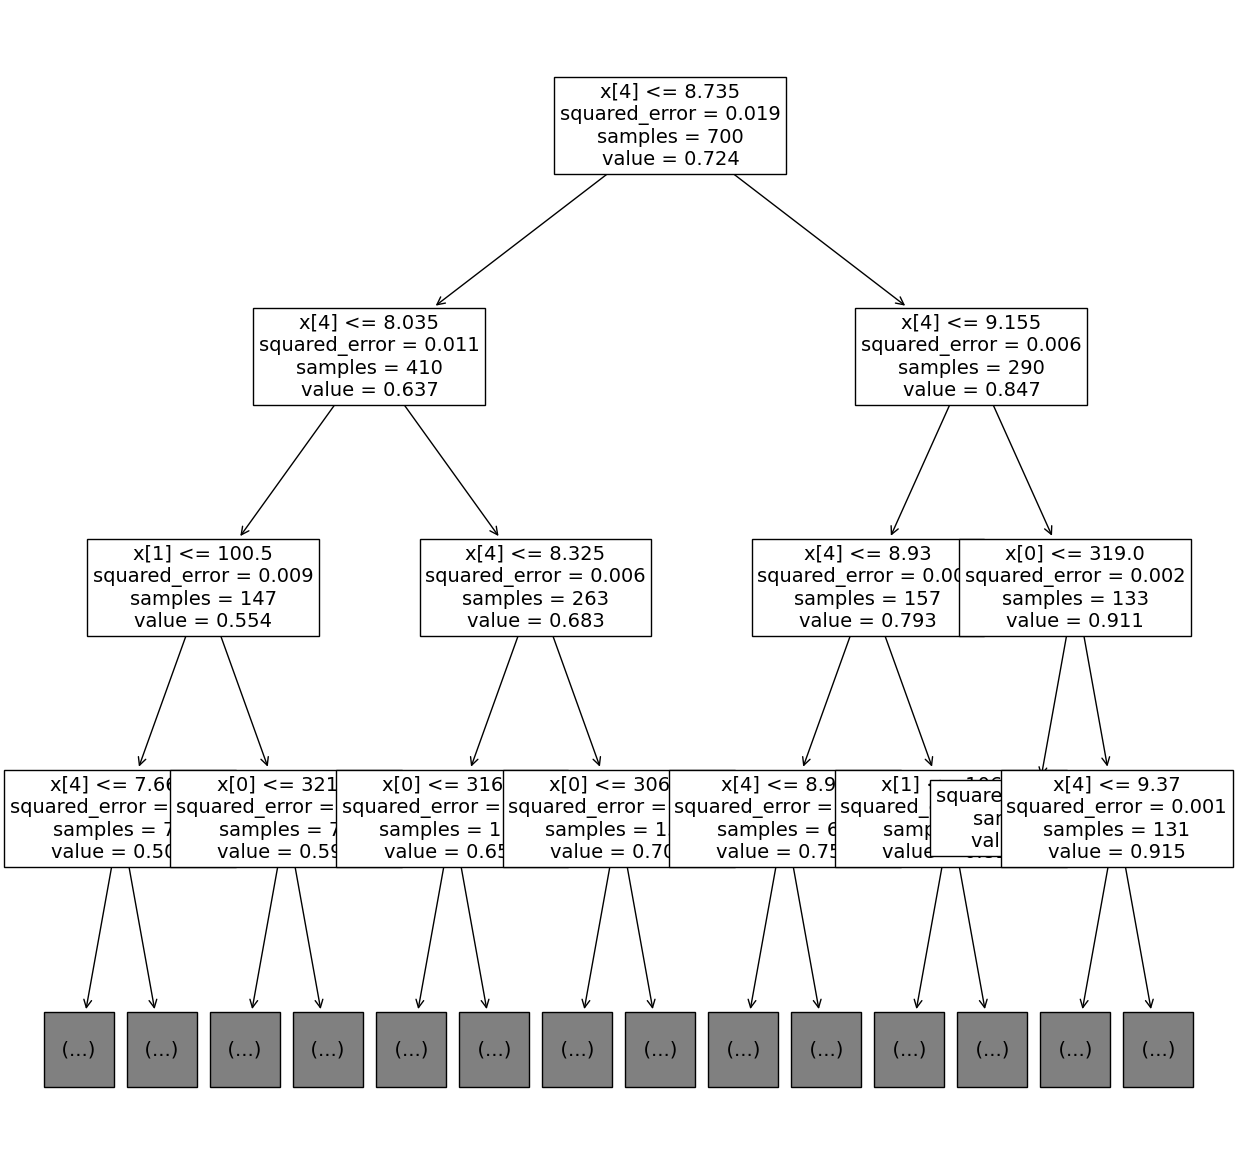

In [47]:
# Utilizamos un árbol de regresión
# Verificamos sus métricas

from sklearn.tree import DecisionTreeRegressor, plot_tree

regression_metrics(DecisionTreeRegressor(random_state=1234),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

tree_reg = DecisionTreeRegressor(random_state=1234).fit(X_train['mean_rem'],y_train['mean_rem'])

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(15,15))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


Búsqueda del mejor modelo para Random Forest con GridSearchCV

In [48]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de regresión
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo de ejecución aprox: 12s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.537 total time=   0.1s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.529 total time=   0.1s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.531 total time=   0.1s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.537 total time=   0.1s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.547 total time=   0.1s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.580 total time=   0.1s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.537 total time=   0.1s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.529 total time=   0.1s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [49]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

{'max_depth': 7,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [50]:
# El R^2 del mejor modelo

tuning_model.best_score_

0.8088752962168376

Con la identificación de los mejores parámetros corremos nuevamente el modelo:

In [51]:
# El mejor modelo de árbol de regresión
# Con todas datos imputados con la media y eliminación de variables altamente correlacionadas

tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorWins.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorWinsMetrics.pkl','wb'))

Training R^2 = 0.9168975812542384
Test R^2 = 0.8150419997598579
Training Adj R^2 = 0.9160569498507408
Test Adj R^2 = 0.8106080750965668
Training MAE = 0.02558743890856229
Test MAE = 0.0404334388541991
Training MAPE = 0.04001224047610955
Test MAPE = 0.06562506008603705
Training RMSE = 0.04023941099706225
Test RMSE = 0.06105630913149042


[Text(0.5446428571428571, 0.9, 'x[4] <= 8.735\nsquared_error = 0.019\nsamples = 700\nvalue = 0.724'),
 Text(0.2857142857142857, 0.7, 'x[4] <= 8.035\nsquared_error = 0.011\nsamples = 410\nvalue = 0.637'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 100.5\nsquared_error = 0.009\nsamples = 147\nvalue = 0.554'),
 Text(0.07142857142857142, 0.3, 'x[4] <= 7.665\nsquared_error = 0.007\nsamples = 70\nvalue = 0.507'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 321.0\nsquared_error = 0.007\nsamples = 77\nvalue = 0.598'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'x[4] <= 8.325\nsquared_error = 0.006\nsamples = 263\nvalue = 0.683'),
 Text(0.35714285714285715, 0.3, 'x[0] <= 316.5\nsquared_error = 0.005\nsamples = 111\nvalue = 0.653'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n')

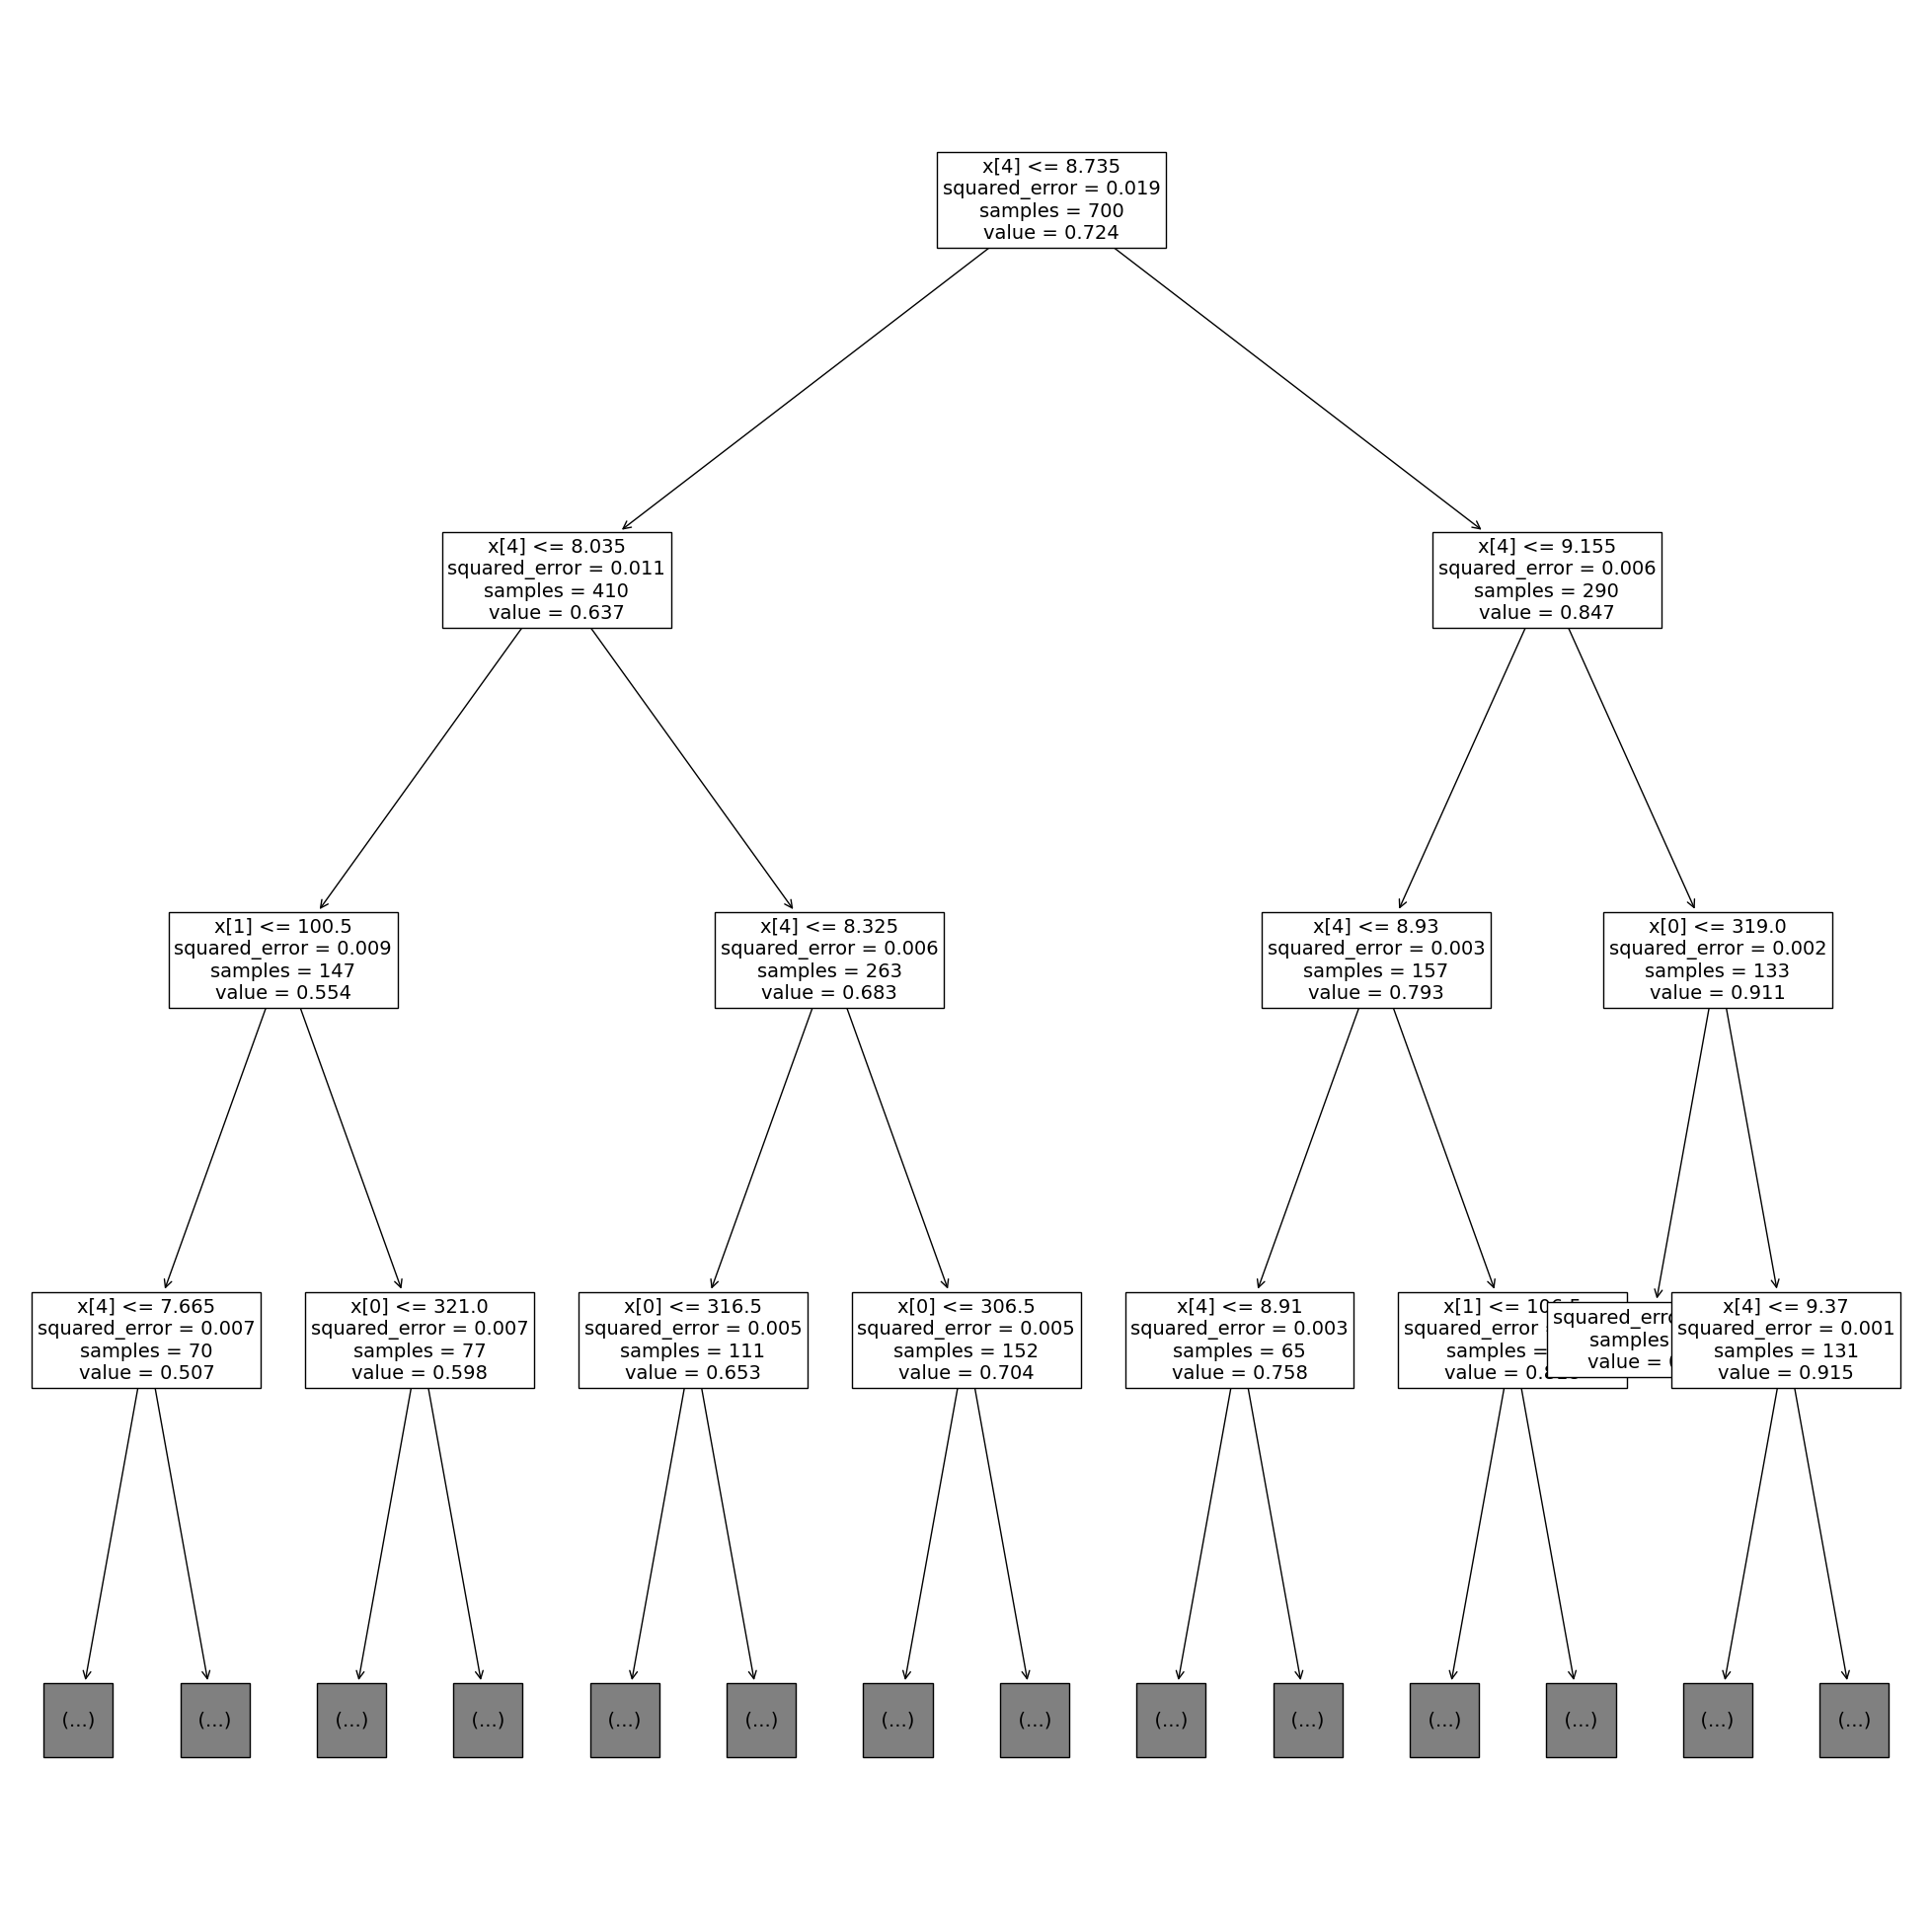

In [52]:
tree_reg.fit(X_train['mean_rem'],y_train['mean_rem'])
plt.figure(figsize=(25,25))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)

### 6.4. Modelo de Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1234)

regression_metrics(rf,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

rf.fit(X_train['mean_rem'],y_train['mean_rem'])
print(rf.get_params())

Training R^2 = 0.9879038300810243
Test R^2 = 0.9232807398969203
Training Adj R^2 = 0.9877814699806878
Test Adj R^2 = 0.9214415795519835
Training MAE = 0.009790714285714302
Test MAE = 0.025702999999999955
Training MAPE = 0.015532505592138458
Test MAPE = 0.04158422956519456
Training RMSE = 0.015352132936966292
Test RMSE = 0.03932295894258209
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


Búsqueda del mejor modelo para Random Forest con GridSearchCV

In [54]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [5,10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.845 total time=   1.7s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.834 total time=   2.0s
[CV 3/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.811 total time=   2.8s
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.845 total time=   4.6s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.833 total time=   3.2s
[CV 3/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.814 total time=   2.2s
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.845 total time=   0.8s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.834 total time=   0.7s
[CV

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [55]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [56]:
tuning_model.best_score_

0.8592927743010685

Modelo de random forest con los mejores parámetros

In [57]:
# El mejor modelo de Random Forest
# Con imputación con la media y elimnación de variables

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/RandomForestRegressorWins.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorWinsMetrics.pkl','wb'))


Training R^2 = 0.9710868681541424
Test R^2 = 0.90298362290131
Training Adj R^2 = 0.9707943942770889
Test Adj R^2 = 0.9006578878338756
Training MAE = 0.015171742017308122
Test MAE = 0.03004472243150366
Training MAPE = 0.02424853669029674
Test MAPE = 0.04858963561778287
Training RMSE = 0.023735170252028905
Test RMSE = 0.04421977345435638


### 6.5 Modelos de Gradient Boost


In [58]:
# Datos imputados con la media

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=1234)

regression_metrics(gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

gb.fit(X_train['mean_rem'],y_train['mean_rem'])
print(gb.get_params())

Training R^2 = 0.9158229403440745
Test R^2 = 0.8711576470014161
Training Adj R^2 = 0.914971438295532
Test Adj R^2 = 0.8680689604569295
Training MAE = 0.02758218042298161
Test MAE = 0.036750904661485645
Training MAPE = 0.042800384445558316
Test MAPE = 0.05910877582913381
Training RMSE = 0.04049875371760637
Test RMSE = 0.05095928322544558
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1234, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Corremos el modelo de gradient boost y revisamos el ajuste a los datos:

In [59]:
# Tiempo de ejecución aprox: 6m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.872 total time=   0.7s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.859 total time=   0.6s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.841 total time=   0.6s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.863 total time=   0.4s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.845 total time=   0.4s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.832 total time=   0.4s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.883 total time=   0.9s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.870 total time=   1.0s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [60]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [61]:
tuning_model.best_score_

0.8836393548659953

Modelo de gradient boost con los mejores parámetros

In [62]:
gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorWins.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorWinsMetrics.pkl','wb'))

Training R^2 = 0.999289415895942
Test R^2 = 0.9448541527940713
Training Adj R^2 = 0.99928222790645
Test Adj R^2 = 0.9435321633062579
Training MAE = 0.0027543584587379323
Test MAE = 0.017222607189837202
Training MAPE = 0.004035307833909227
Test MAPE = 0.028029734159314344
Training RMSE = 0.0037209387991004664
Test RMSE = 0.033338832994554916


### Modelo XGBoost

Mejoramos el modelo Gradient Boost por uno extremo.

In [63]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=1234)
regression_metrics(model,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Training R^2 = 0.9998234711690606
Test R^2 = 0.9323405816636995
Training Adj R^2 = 0.9998216854727938
Test Adj R^2 = 0.9307186093063224
Training MAE = 0.0011529367378779797
Test MAE = 0.017149870165189103
Training MAPE = 0.0016582064856148872
Test MAPE = 0.028069387444002666
Training RMSE = 0.0018546100356069376
Test RMSE = 0.03692819809885853


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...),
 {'Training R^2': 0.9998234711690606,
  'Test R^2': 0.9323405816636995,
  'Training Adj R^2': 0.9998216854727938,
  'Test Adj R^2': 0.9307186093063224,
  'Training MAE': 0.0011529367378779797,
  'Test MAE': 0.017149870165189103,
  'Training 

In [64]:
# Tiempo de ejecución aprox: 28m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),
                  'eta'          : (0.001,10)
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.844 total time=   0.2s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.826 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.805 total time=   0.1s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.842 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.823 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gam

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1234, ...),
             param_grid={'alpha': (0, 10), 'eta': (0.001, 10), 'gamma': (0, 1),
                         'learning_rate': [0.01, 0.03], 'max_depth': (2, 5),
                         'min_child_weight': (0, 5),
                         'n_estimators': [500, 1000],
                         'scale_pos_weight': (5, 15), 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [65]:
tuning_model.best_params_

{'alpha': 0,
 'eta': 0.001,
 'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 1000,
 'scale_pos_weight': 5,
 'subsample': 0.5}

In [66]:
tuning_model.best_score_

0.8828484252381864

Se corre el modelo con los mejores parámetros hallados

In [67]:
# Con los mejores parámetros

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorWins.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorWinsMetrics.pkl','wb'))

Training R^2 = 0.9980996460703544
Test R^2 = 0.9400595895964502
Training Adj R^2 = 0.9980804228369621
Test Adj R^2 = 0.9386226619497897
Training MAE = 0.0043033396363258355
Test MAE = 0.019258214652538297
Training MAPE = 0.006236991975286895
Test MAPE = 0.030781554227092743
Training RMSE = 0.006085020274311668
Test RMSE = 0.03475792510179576


### Cargamos los distintos modelos

In [69]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/KnnRegressorWinsMetrics.pkl','rb')))
names.append('KnnRegressorWinsMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSWinsMetrics.pkl','rb')))
names.append('KnnRegressorFSWinsMetrics')

metrics.append(pickle.load(open('metrics/DecisionTreeRegressorWinsMetrics.pkl','rb')))
names.append('DecisionTreeRegressorWinsMetrics')


metrics.append(pickle.load(open('metrics/RandomForestRegressorWinsMetrics.pkl','rb')))
names.append('RandomForestRegressorWinsMetrics')

metrics.append(pickle.load(open('metrics/GradientBoostingRegressorWinsMetrics.pkl','rb')))
names.append('GradientBoostingRegressorWinsMetrics')

metrics.append(pickle.load(open('metrics/XGBoostingRegressorWinsMetrics.pkl','rb')))
names.append('XGBoostingRegressorWinsMetrics')




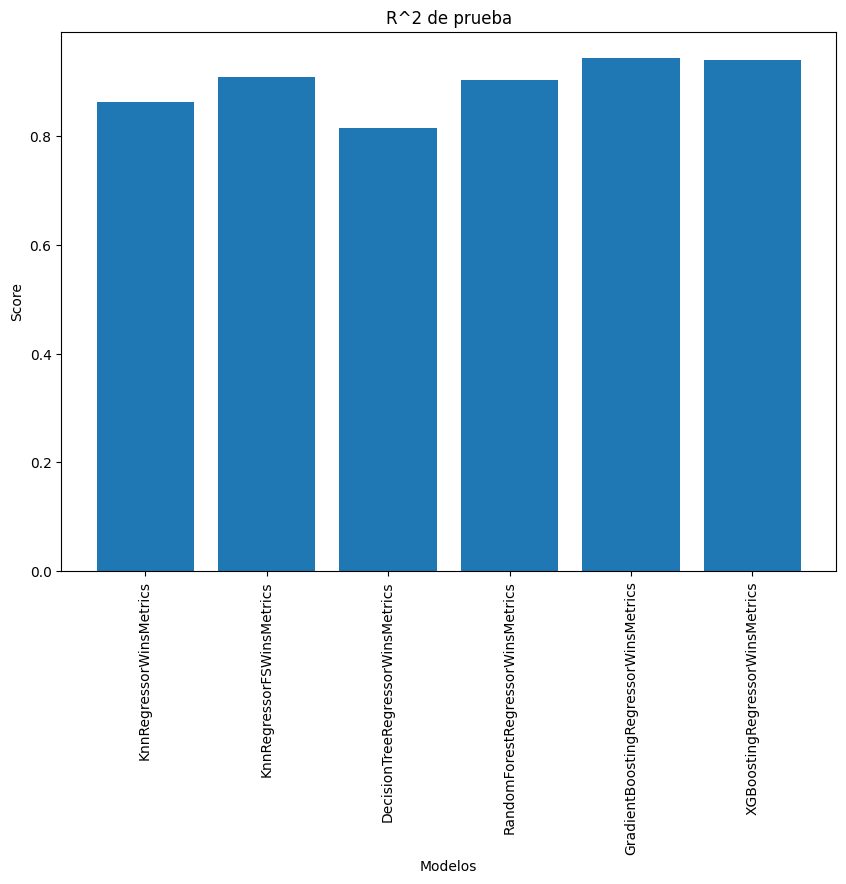

In [70]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 de prueba

fig, ax = plt.subplots()
fig.set_size_inches((10,7))
ax.bar(names, [i['Test R^2'] for i in metrics])
ax.set(title='R^2 de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

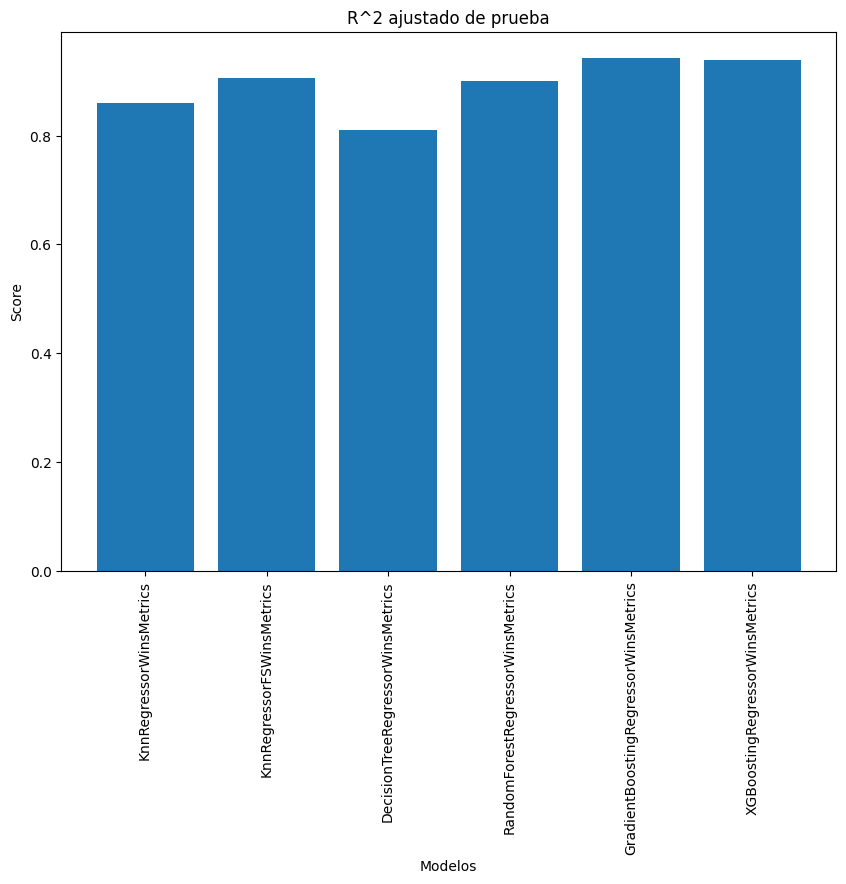

In [71]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 ajustado de prueba

fig, ax = plt.subplots()
fig.set_size_inches((10,7))
ax.bar(names, [i['Test Adj R^2'] for i in metrics])
ax.set(title='R^2 ajustado de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

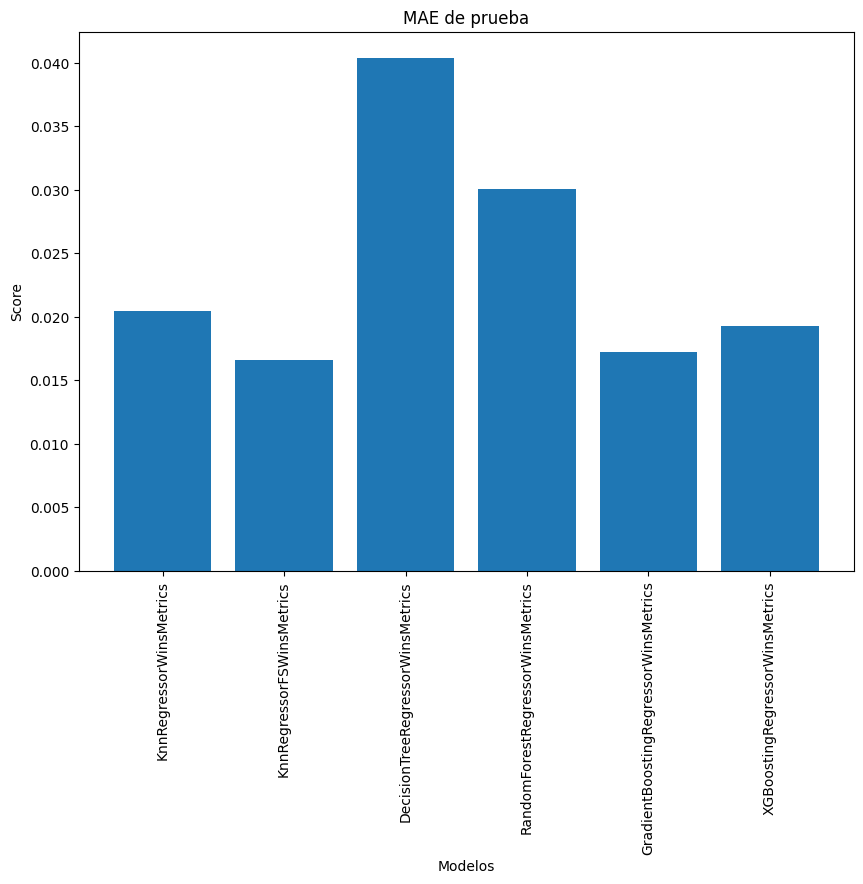

In [72]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((10,7))
ax.bar(names, [i['Test MAE'] for i in metrics])
ax.set(title='MAE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

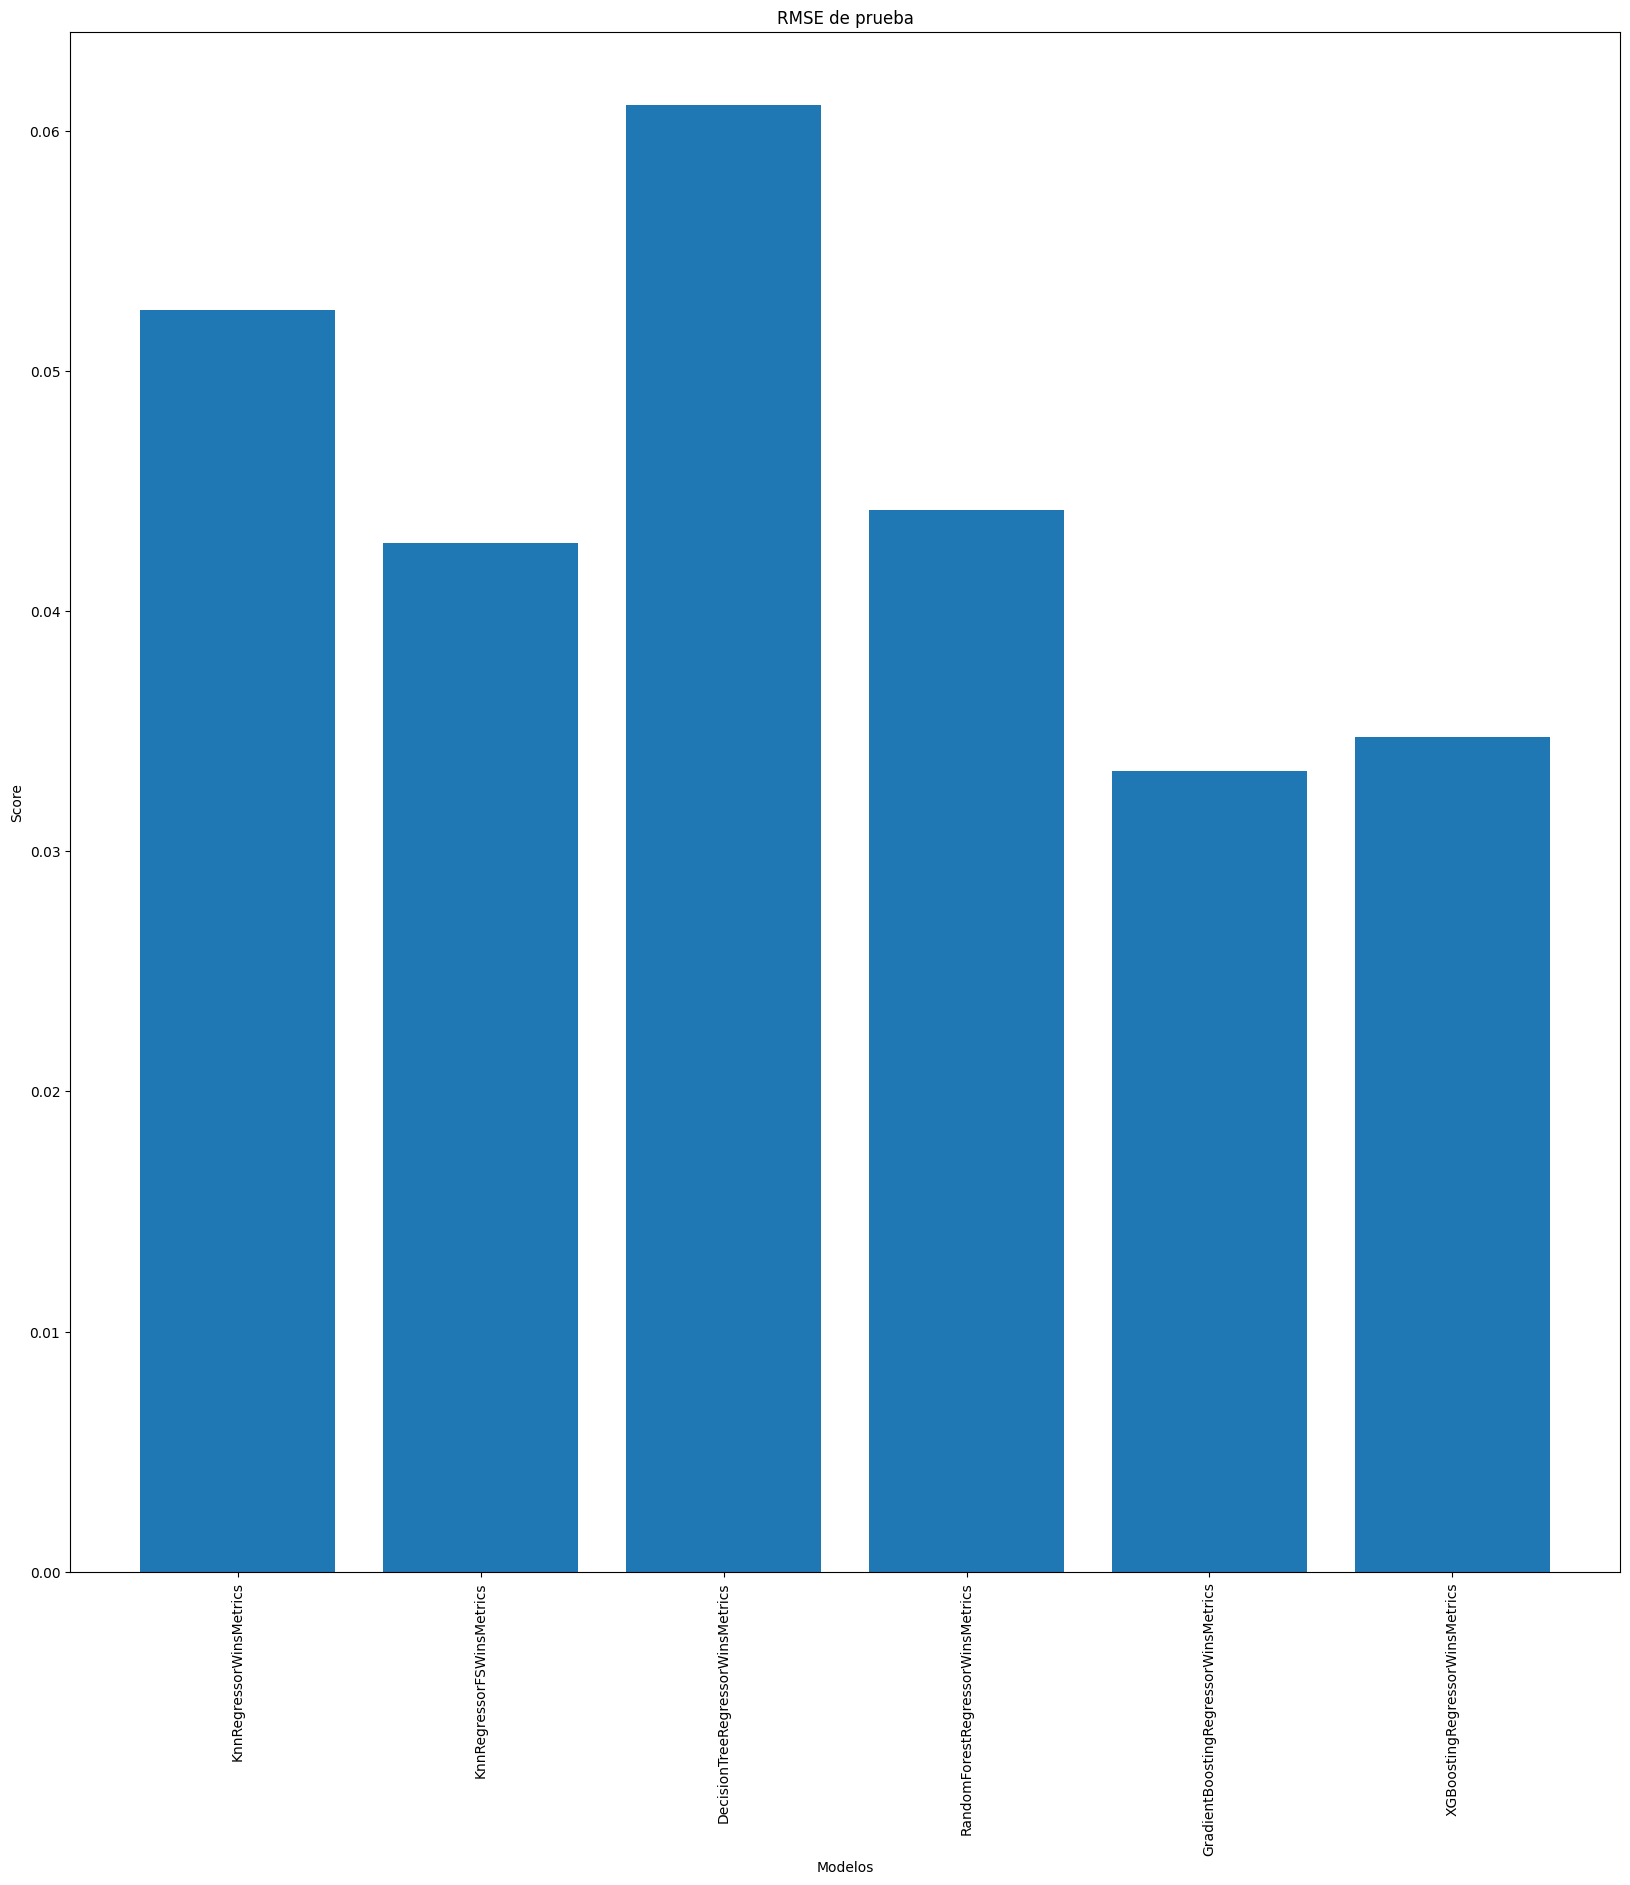

In [73]:
# Diagrama de barras para observar el modelo más importante de acuerdo al RMSE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test RMSE'] for i in metrics])
ax.set(title='RMSE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [74]:
# Se organizan los modelos de acuerdo a su R^2 de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test R^2':model[1]['Test R^2']},ignore_index=True)
ranking

,Model,Test R^2
0,GradientBoostingRegressorWinsMetrics,0.944854
1,XGBoostingRegressorWinsMetrics,0.940060
2,KnnRegressorFSWinsMetrics,0.908940
3,RandomForestRegressorWinsMetrics,0.902984
4,KnnRegressorWinsMetrics,0.863030
5,DecisionTreeRegressorWinsMetrics,0.815042


In [75]:
# Se organizan los modelos de acuerdo a su R^2 ajustado de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Adj R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Adj R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test Adj R^2':model[1]['Test Adj R^2']},ignore_index=True)
ranking

,Model,Test Adj R^2
0,GradientBoostingRegressorWinsMetrics,0.943532
1,XGBoostingRegressorWinsMetrics,0.938623
2,KnnRegressorFSWinsMetrics,0.906757
3,RandomForestRegressorWinsMetrics,0.900658
4,KnnRegressorWinsMetrics,0.859746
5,DecisionTreeRegressorWinsMetrics,0.810608


In [76]:
# Se organizan los modelos de acuerdo a su MAE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAE':model[1]['Test MAE']},ignore_index=True)
ranking

,Model,Test MAE
0,KnnRegressorFSWinsMetrics,0.016600
1,GradientBoostingRegressorWinsMetrics,0.017223
2,XGBoostingRegressorWinsMetrics,0.019258
3,KnnRegressorWinsMetrics,0.020467
4,RandomForestRegressorWinsMetrics,0.030045
5,DecisionTreeRegressorWinsMetrics,0.040433


In [77]:
# Se organizan los modelos de acuerdo a su RMSE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test RMSE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test RMSE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test RMSE':model[1]['Test RMSE']},ignore_index=True)
ranking

,Model,Test RMSE
0,GradientBoostingRegressorWinsMetrics,0.033339
1,XGBoostingRegressorWinsMetrics,0.034758
2,KnnRegressorFSWinsMetrics,0.042841
3,RandomForestRegressorWinsMetrics,0.044220
4,KnnRegressorWinsMetrics,0.052542
5,DecisionTreeRegressorWinsMetrics,0.061056


La evaluación de los modelos nos arroja que el que mejor se ajusta y predice el comportamiento de los datos es el Gradien Boost, siendo el que mayor $R^2$ y $Adj R^2$ presenta y un menor RMSE.